In [1]:
import random
import sys
from tensorflow import keras
import numpy as np
np.set_printoptions(threshold=sys.maxsize)
import string
from tensorflow.keras.utils import to_categorical
from matplotlib import pyplot as plt
import pandas as pd

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
import unicodedata
import urllib3
from tensorflow.keras.layers import Embedding, GRU, Dense
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer

In [3]:
from ast import literal_eval
df = pd.read_csv('5min_seq_intVec_added_max_clst.csv')
condition = (df.cluster == 1)
df_clst2_100 = df[condition]
df_clst2_100

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,Unnamed: 0.1.1.1.1,id,sequence,time,user_id,time_min,...,diff_mean,trimmed,trimmed_cnt,durations,silhouette_coeff,seq_list_long,seq_int_vec,trimmed_seq_int_vec,length_vec,cluster
0,0,0,0,0,0,20081103232153,--Ta0001Ta0001------Ta0002Ta0002Ta0002Ta0002Ta...,4:06:00,0,0 days 04:06:00,...,-148.774194,"[""'Ta0001'"", "" 'Ta0002'"", "" 'Ta0003'""]",3,"[2, 17, 1]",0.003892,"['-', '-', 'Ta0001', 'Ta0001', '-', '-', '-', ...","[1, 1, 7058, 7058, 1, 1, 1, 1, 1, 1, 7059, 705...","[7058, 7059, 7060]",49,1
10,10,10,10,10,10,20090413050806,------Rx0023Rx0023Rx0023Rx0023Rx0023---Ux0004U...,3:36:00,0,0 days 03:36:00,...,-178.774194,"[""'Rx0023'"", "" 'Ux0004'"", "" 'Sm0001'""]",3,"[5, 38, 2]",0.499196,"['-', '-', '-', '-', '-', '-', 'Rx0023', 'Rx00...","[1, 1, 1, 1, 1, 1, 1481, 1481, 1481, 1481, 148...","[1481, 7558, 4405]",79,1
12,12,12,12,12,12,20090415074008,------------------Sx0016Sx0016Sx0016Sx0016Sx00...,3:01:00,0,0 days 03:01:00,...,-213.774194,"[""'Sx0016'"", "" 'Ux0004'"", "" 'Rx0004'""]",3,"[20, 12, 10]",0.498283,"['-', '-', '-', '-', '-', '-', '-', '-', '-', ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[4553, 7558, 1462]",72,1
15,15,15,15,15,15,20090420013034,------Ux0004Ux0004Ux0004Ux0004Ux0004Ux0004Ux00...,3:06:00,0,0 days 03:06:00,...,-208.774194,"[""'Ux0004'"", "" 'Rx0004'""]",2,"[53, 6]",0.151806,"['-', '-', '-', '-', '-', '-', 'Ux0004', 'Ux00...","[1, 1, 1, 1, 1, 1, 7558, 7558, 7558, 7558, 755...","[7558, 1462]",76,1
21,21,21,21,21,21,20090427010230,----Ux0004Ux0004Ux0004Ux0004Ux0004Ux0004Ux0004...,5:12:00,0,0 days 05:12:00,...,-82.774194,"[""'Ux0004'"", "" 'St0001'""]",2,"[60, 4]",0.151806,"['-', '-', '-', '-', 'Ux0004', 'Ux0004', 'Ux00...","[1, 1, 1, 1, 7558, 7558, 7558, 7558, 7558, 755...","[7558, 4467]",85,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2621,2621,2621,2621,2621,2621,20111224154804,------------Sx2322Sx2322Sx2322Sx2322Sx2322Sx23...,5:05:00,153,0 days 05:05:00,...,-30.614458,"[""'Sx2322'"", "" 'Ux0261'"", "" 'Nc0033'""]",3,"[12, 45, 40]",0.497656,"['-', '-', '-', '-', '-', '-', '-', '-', '-', ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 6859, 685...","[6859, 7815, 1361]",129,1
2648,2648,2648,2648,2648,2648,20120423122200,Sx0531Sx0531----Sx0486-Rx0591Rx0591Rx0591Rx059...,1:02:00,159,0 days 01:02:00,...,-426.571429,"[""'Sx0531'"", "" 'Sx0486'"", "" 'Rx0591'""]",3,"[2, 1, 6]",0.497029,"['Sx0531', 'Sx0531', '-', '-', '-', '-', 'Sx04...","[5068, 5068, 1, 1, 1, 1, 5023, 1, 2049, 2049, ...","[5068, 5023, 2049]",20,1
2681,2681,2681,2681,2681,2681,20120617115901,---------Rx2827Rx2827Rx2827--Sm0054Sm0054Sm005...,4:59:00,163,0 days 04:59:00,...,-29.771429,"[""'Rx2827'"", "" 'Sm0054'"", "" 'Sx2477'""]",3,"[3, 24, 18]",0.499196,"['-', '-', '-', '-', '-', '-', '-', '-', '-', ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 4285, 4285, 4285, ...","[4285, 4458, 7014]",64,1
2682,2682,2682,2682,2682,2682,20120622110655,Rx2889Rx2889Rx2889Rx2889Rx2889Rx2889Rx2889Rx28...,2:44:00,163,0 days 02:44:00,...,-164.771429,"[""'Rx2889'"", "" 'Sx2398'"", "" 'Bs0239'""]",3,"[17, 5, 6]",0.499196,"['Rx2889', 'Rx2889', 'Rx2889', 'Rx2889', 'Rx28...","[4347, 4347, 4347, 4347, 4347, 4347, 4347, 434...","[4347, 6935, 369]",37,1


In [4]:
# from tensorflow.keras.preprocessing.sequence import pad_sequences
# train_seq = 
avg = df_clst2_100['length_vec'].mean()
med = df_clst2_100['length_vec'].median()
print(avg)
print(med)

67.6923076923077
50.0


In [5]:
from ast import literal_eval
df_clst2_100['seq_int_vec'] = df_clst2_100['seq_int_vec'].apply(lambda x: literal_eval(str(x)))

C:\Users\User\AppData\Local\Temp/ipykernel_14772/1354551308.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clst2_100['seq_int_vec'] = df_clst2_100['seq_int_vec'].apply(lambda x: literal_eval(str(x)))


In [6]:
all_data = df_clst2_100['seq_int_vec']
all_data = all_data.values
all_data

array([list([1, 1, 7058, 7058, 1, 1, 1, 1, 1, 1, 7059, 7059, 7059, 7059, 7059, 7059, 7059, 7059, 7059, 7059, 7059, 7059, 7059, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 7059, 7059, 7059, 7059, 1, 1, 1, 1, 7060, 1, 1]),
       list([1, 1, 1, 1, 1, 1, 1481, 1481, 1481, 1481, 1481, 1, 1, 1, 7558, 7558, 7558, 7558, 7558, 7558, 7558, 7558, 7558, 7558, 7558, 7558, 7558, 7558, 7558, 7558, 7558, 7558, 7558, 7558, 7558, 7558, 7558, 7558, 7558, 7558, 7558, 7558, 7558, 7558, 7558, 7558, 7558, 7558, 7558, 7558, 7558, 7558, 1, 4405, 4405, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]),
       list([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4553, 4553, 4553, 4553, 4553, 4553, 4553, 4553, 4553, 4553, 4553, 4553, 4553, 4553, 4553, 4553, 4553, 4553, 4553, 4553, 1, 1, 1, 1, 1, 1, 7558, 7558, 7558, 7558, 7558, 7558, 7558, 7558, 7558, 7558, 7558, 7558, 1, 1, 1462, 1462, 1462, 1462, 1462, 1462, 1462, 1462, 1462, 1462, 1, 1, 1, 1]),
       list([1, 1, 1, 1, 1, 1, 755

In [7]:
seq =  df_clst2_100.iloc[0]['sequence']
integer = df_clst2_100.iloc[0]['seq_int_vec']
print('Sequence: ',seq)
print(" ")
print('Mapped integers: ',integer)

Sequence:  --Ta0001Ta0001------Ta0002Ta0002Ta0002Ta0002Ta0002Ta0002Ta0002Ta0002Ta0002Ta0002Ta0002Ta0002Ta0002---------------Ta0002Ta0002Ta0002Ta0002----Ta0003--
 
Mapped integers:  [1, 1, 7058, 7058, 1, 1, 1, 1, 1, 1, 7059, 7059, 7059, 7059, 7059, 7059, 7059, 7059, 7059, 7059, 7059, 7059, 7059, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 7059, 7059, 7059, 7059, 1, 1, 1, 1, 7060, 1, 1]


In [8]:
all_len = []
for i in all_data:
    all_len.append(len(i))

all_len = np.array(all_len)

In [9]:
print('길이 최솟값: ' ,min(all_len))
print('길이 최댓값: ' ,max(all_len))
print('길이 중간값: ' , np.mean(all_len))
print('길이 평균값: ' , np.median(all_len))

길이 최솟값:  13
길이 최댓값:  564
길이 중간값:  67.6923076923077
길이 평균값:  50.0


In [10]:
from collections import OrderedDict

total_input = []
total_target = []
input_without_repeat = []
target_without_repeat = []

time_steps = 15 # input data의 time steps
for_periods = 10 # output data의 time steps

for i in range(len(all_data)):  
    seq_len = len(all_data[i])
    if seq_len < 25:
        print(i, seq_len)
        continue
    for j in range(time_steps, seq_len-1):   
        ori_input = all_data[i][j-time_steps:j]
        ori_target = all_data[i][j:j+for_periods]
        if(len(ori_input)>=time_steps and len(ori_target)>=for_periods):
            total_input.append(ori_input)
            total_target.append(ori_target)
        else: continue

for x in total_input:
    input_without_repeat.append(list(OrderedDict.fromkeys(x)))

for y in total_target:
    target_without_repeat.append(list(OrderedDict.fromkeys(y)))

36 14
39 23
43 16
44 13
46 21
47 15
53 16
68 22
71 24
106 24
107 13
116 17
120 20
124 24
134 21
138 17
147 20
167 22
175 13
176 13
181 24
191 20


In [11]:
input_without_repeat

[[1, 7058, 7059],
 [1, 7058, 7059],
 [7058, 1, 7059],
 [7058, 1, 7059],
 [1, 7059],
 [1, 7059],
 [1, 7059],
 [1, 7059],
 [1, 7059],
 [1, 7059],
 [7059, 1],
 [7059, 1],
 [7059, 1],
 [7059, 1],
 [7059, 1],
 [7059, 1],
 [7059, 1],
 [7059, 1],
 [7059, 1],
 [7059, 1],
 [7059, 1],
 [7059, 1],
 [7059, 1],
 [1],
 [1, 7059],
 [1, 1481, 7558],
 [1, 1481, 7558],
 [1, 1481, 7558],
 [1, 1481, 7558],
 [1, 1481, 7558],
 [1, 1481, 7558],
 [1481, 1, 7558],
 [1481, 1, 7558],
 [1481, 1, 7558],
 [1481, 1, 7558],
 [1481, 1, 7558],
 [1, 7558],
 [1, 7558],
 [1, 7558],
 [7558],
 [7558],
 [7558],
 [7558],
 [7558],
 [7558],
 [7558],
 [7558],
 [7558],
 [7558],
 [7558],
 [7558],
 [7558],
 [7558],
 [7558],
 [7558],
 [7558],
 [7558],
 [7558],
 [7558],
 [7558],
 [7558],
 [7558],
 [7558],
 [7558, 1],
 [7558, 1, 4405],
 [7558, 1, 4405],
 [7558, 1, 4405],
 [7558, 1, 4405],
 [7558, 1, 4405],
 [7558, 1, 4405],
 [7558, 1, 4405],
 [7558, 1, 4405],
 [7558, 1, 4405],
 [7558, 1, 4405],
 [7558, 1, 4405],
 [7558, 1, 4405],
 [75

In [12]:
target_without_repeat

[[7059, 1],
 [7059, 1],
 [7059, 1],
 [7059, 1],
 [7059, 1],
 [7059, 1],
 [7059, 1],
 [7059, 1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1, 7059],
 [1, 7059],
 [1, 7059],
 [1, 7059],
 [1, 7059],
 [1, 7059],
 [1, 7059],
 [1, 7059],
 [1, 7059, 7060],
 [7059, 1, 7060],
 [7059, 1, 7060],
 [7558],
 [7558],
 [7558],
 [7558],
 [7558],
 [7558],
 [7558],
 [7558],
 [7558],
 [7558],
 [7558],
 [7558],
 [7558],
 [7558],
 [7558],
 [7558],
 [7558],
 [7558],
 [7558],
 [7558],
 [7558],
 [7558],
 [7558],
 [7558],
 [7558],
 [7558],
 [7558],
 [7558],
 [7558, 1],
 [7558, 1, 4405],
 [7558, 1, 4405],
 [7558, 1, 4405],
 [7558, 1, 4405],
 [7558, 1, 4405],
 [7558, 1, 4405],
 [7558, 1, 4405],
 [7558, 1, 4405],
 [1, 4405],
 [4405, 1],
 [4405, 1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1, 4553],
 [1, 4553],
 [1, 4553],
 [4553],
 [4553],
 [4553],
 [4553],
 [4553],
 [4553],
 [4553],
 [4553],
 [4553],
 [4553],
 [4553],
 [4553, 1],
 [4553, 1],
 [4553, 1],
 [4553, 1],
 

In [13]:
import copy

encoder_input = copy.deepcopy(total_input)
encoder_input = np.array(encoder_input)

In [14]:
decoder_input = copy.deepcopy(total_target)

for i in decoder_input:
    i.insert(0, 2)
    
decoder_input = np.array(decoder_input)
print(decoder_input)

[[   2 7059 7059 7059 7059 7059 7059 7059 7059    1    1]
 [   2 7059 7059 7059 7059 7059 7059 7059    1    1    1]
 [   2 7059 7059 7059 7059 7059 7059    1    1    1    1]
 [   2 7059 7059 7059 7059 7059    1    1    1    1    1]
 [   2 7059 7059 7059 7059    1    1    1    1    1    1]
 [   2 7059 7059 7059    1    1    1    1    1    1    1]
 [   2 7059 7059    1    1    1    1    1    1    1    1]
 [   2 7059    1    1    1    1    1    1    1    1    1]
 [   2    1    1    1    1    1    1    1    1    1    1]
 [   2    1    1    1    1    1    1    1    1    1    1]
 [   2    1    1    1    1    1    1    1    1    1    1]
 [   2    1    1    1    1    1    1    1    1    1    1]
 [   2    1    1    1    1    1    1    1    1    1    1]
 [   2    1    1    1    1    1    1    1    1    1    1]
 [   2    1    1    1    1    1    1    1    1    1 7059]
 [   2    1    1    1    1    1    1    1    1 7059 7059]
 [   2    1    1    1    1    1    1    1 7059 7059 7059]
 [   2    1   

In [15]:
decoder_target = copy.deepcopy(total_target)

for i in decoder_target:
    length = len(i)
    i.insert(len(i), 3)

decoder_target = np.array(decoder_target)
print(decoder_target)

[[7059 7059 7059 7059 7059 7059 7059 7059    1    1    3]
 [7059 7059 7059 7059 7059 7059 7059    1    1    1    3]
 [7059 7059 7059 7059 7059 7059    1    1    1    1    3]
 [7059 7059 7059 7059 7059    1    1    1    1    1    3]
 [7059 7059 7059 7059    1    1    1    1    1    1    3]
 [7059 7059 7059    1    1    1    1    1    1    1    3]
 [7059 7059    1    1    1    1    1    1    1    1    3]
 [7059    1    1    1    1    1    1    1    1    1    3]
 [   1    1    1    1    1    1    1    1    1    1    3]
 [   1    1    1    1    1    1    1    1    1    1    3]
 [   1    1    1    1    1    1    1    1    1    1    3]
 [   1    1    1    1    1    1    1    1    1    1    3]
 [   1    1    1    1    1    1    1    1    1    1    3]
 [   1    1    1    1    1    1    1    1    1    1    3]
 [   1    1    1    1    1    1    1    1    1 7059    3]
 [   1    1    1    1    1    1    1    1 7059 7059    3]
 [   1    1    1    1    1    1    1 7059 7059 7059    3]
 [   1    1   

In [16]:
print('인코더의 입력의 크기(shape) :',encoder_input.shape)
print('디코더의 입력의 크기(shape) :',decoder_input.shape)
print('디코더의 레이블의 크기(shape) :',decoder_target.shape)

인코더의 입력의 크기(shape) : (8636, 15)
디코더의 입력의 크기(shape) : (8636, 11)
디코더의 레이블의 크기(shape) : (8636, 11)


In [17]:
print(len(encoder_input))
print(len(decoder_input))
print(len(decoder_target))

8636
8636
8636


In [18]:
indices = np.arange(encoder_input.shape[0])
np.random.shuffle(indices)
print('랜덤 시퀀스 :',indices)

랜덤 시퀀스 : [4938 5417 8565 7902 7607 7610 4317   38 4180 6566 5042 2735 4536  856
 8407 2043 6562 7087 6857   68 5144 7149 4274 5330 7700 5496 5996 2137
 3236 3750 4338 1635 2661 7100 2637 6836 4749 4845 4110  837  282 2950
 1932 4745 8547 6726  121  862 5049 2961 6129 2563 5940 4582 3098 4711
 6478 7969 6861 1435 5649 8036 2957 1677 5590 6534 4672 1184 1871 5250
 3338 4925 5910 4005 8238 5561 3561 7322 5404 6539 3899 1154 4207  343
 8516 1427 4032 8503 2525 5365 3529 7791 5427  321 1317 2611 8517 6076
 6176 6716 3519 6796 3354 3858 3346 3597 2474 5621 5319 2979 4964 5817
 7186 1251  240 6341 2786 5099 2364 2295 1687 7739 3919 4249 3404 7541
 3699 1492 3967  312  531 7306 3132 4505 8032 8107 7456 6132 4884 4895
 7122 7000 1477 6786 1204 6845 6421 2880  811 7751 7938 2376 8056 8328
 6405  589 2664 8441 2851 2327 2021 6959 2050 1529 5857 2218 2609 5744
 5992 1395 7363 2506 3285 7799 5778 5777 4428 3700 6835 3894 4334 2635
 2492 1650 2737 2063 7061 2233 4997 1847 1194 2789 8398 7795 4232 59

In [19]:
encoder_input = encoder_input[indices]
decoder_input = decoder_input[indices]
decoder_target = decoder_target[indices]

In [20]:
encoder_input[97]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [21]:
decoder_input[97]

array([2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [22]:
decoder_target[97]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3])

In [23]:
n_of_val = int(len(encoder_input)*0.1)
print('검증 데이터의 개수 :',n_of_val)

검증 데이터의 개수 : 863


In [24]:
n_of_test = int(len(encoder_input)*0.1)
print('테스트 데이터의 개수 :',n_of_test)

테스트 데이터의 개수 : 863


In [25]:
encoder_input_train = encoder_input[0:len(encoder_input)-n_of_val-n_of_test]
decoder_input_train = decoder_input[0:len(decoder_input)-n_of_val-n_of_test]
decoder_target_train = decoder_target[0:len(decoder_target)-n_of_val-n_of_test]

encoder_input_val = encoder_input[len(encoder_input)-n_of_val-n_of_test:len(encoder_input)-n_of_val]
decoder_input_val = decoder_input[len(decoder_input)-n_of_val-n_of_test:len(decoder_input)-n_of_val]
decoder_target_val = decoder_target[len(decoder_target)-n_of_val-n_of_test:len(decoder_target)-n_of_val]

encoder_input_test = encoder_input[len(encoder_input)-n_of_val:]
decoder_input_test = decoder_input[len(decoder_input)-n_of_val:]
decoder_target_test = decoder_target[len(decoder_target)-n_of_val:]

In [26]:
print('training source 데이터의 크기 :',encoder_input_train.shape)
print('training target 데이터의 크기 :',decoder_input_train.shape)
print('training target 레이블의 크기 :',decoder_target_train.shape)

print('validation source 데이터의 크기 :',encoder_input_val.shape)
print('validation target 데이터의 크기 :',decoder_input_val.shape)
print('validation target 레이블의 크기 :',decoder_target_val.shape)

print('test source 데이터의 크기 :',encoder_input_test.shape)
print('test target 데이터의 크기 :',decoder_input_test.shape)

training source 데이터의 크기 : (6910, 15)
training target 데이터의 크기 : (6910, 11)
training target 레이블의 크기 : (6910, 11)
validation source 데이터의 크기 : (863, 15)
validation target 데이터의 크기 : (863, 11)
validation target 레이블의 크기 : (863, 11)
test source 데이터의 크기 : (863, 15)
test target 데이터의 크기 : (863, 11)


In [27]:
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, Masking, TimeDistributed
from tensorflow.keras.models import Model

In [28]:
embedding_dim = 64
hidden_units = 64

In [29]:
vocab_size = 7874

In [30]:
# 인코더
encoder_inputs = Input(shape=(None,))
enc_emb = Embedding(vocab_size, embedding_dim)(encoder_inputs) # 임베딩 층
# enc_masking = Masking(mask_value=0.0)(enc_emb) # 패딩 0은 연산에서 제외
encoder_lstm = LSTM(hidden_units, return_state=True) # 상태값 리턴을 위해 return_state는 True
encoder_outputs, state_h, state_c = encoder_lstm(enc_emb) # 은닉 상태와 셀 상태를 리턴
encoder_states = [state_h, state_c] # 인코더의 은닉 상태와 셀 상태를 저장

In [31]:
# 디코더
decoder_inputs = Input(shape=(None,))
dec_emb_layer = Embedding(vocab_size, hidden_units) # 임베딩 층
dec_emb = dec_emb_layer(decoder_inputs) # 패딩 0은 연산에서 제외
# dec_masking = Masking(mask_value=0.0)(dec_emb)

# 상태값 리턴을 위해 return_state는 True, 모든 시점에 대해서 단어를 예측하기 위해 return_sequences는 True
decoder_lstm = LSTM(hidden_units, return_sequences=True, return_state=True) 

# 인코더의 은닉 상태를 초기 은닉 상태(initial_state)로 사용
decoder_outputs, _, _ = decoder_lstm(dec_emb,
                                     initial_state=encoder_states)

# 모든 시점의 결과에 대해서 소프트맥스 함수를 사용한 출력층을 통해 단어 예측
decoder_dense = Dense(vocab_size, activation='softmax')
decoder_softmax_outputs = decoder_dense(decoder_outputs)

# 모델의 입력과 출력을 정의.
model = Model([encoder_inputs, decoder_inputs], decoder_softmax_outputs)

model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=[tf.keras.metrics.SparseCategoricalAccuracy()])

In [32]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

early_stopping_cb = keras.callbacks.EarlyStopping(patience=6, restore_best_weights=True)

history = model.fit(x=[encoder_input_train, decoder_input_train], y=decoder_target_train, \
          validation_data=([encoder_input_val, decoder_input_val], decoder_target_val),
          batch_size=64, epochs=200, callbacks=[early_stopping_cb])

model.summary()

Epoch 1/200
108/108 [==============================] - 16s 92ms/step - loss: 4.2831 - sparse_categorical_accuracy: 0.4056 - val_loss: 3.1948 - val_sparse_categorical_accuracy: 0.3967
Epoch 2/200
108/108 [==============================] - 8s 78ms/step - loss: 2.8277 - sparse_categorical_accuracy: 0.4110 - val_loss: 2.6810 - val_sparse_categorical_accuracy: 0.4271
Epoch 3/200
108/108 [==============================] - 9s 80ms/step - loss: 2.3663 - sparse_categorical_accuracy: 0.4830 - val_loss: 2.2553 - val_sparse_categorical_accuracy: 0.5199
Epoch 4/200
108/108 [==============================] - 8s 79ms/step - loss: 1.9802 - sparse_categorical_accuracy: 0.5865 - val_loss: 1.9151 - val_sparse_categorical_accuracy: 0.5838
Epoch 5/200
108/108 [==============================] - 8s 76ms/step - loss: 1.6748 - sparse_categorical_accuracy: 0.6580 - val_loss: 1.6325 - val_sparse_categorical_accuracy: 0.6753
Epoch 6/200
108/108 [==============================] - 8s 78ms/step - loss: 1.4286 - spar

Epoch 46/200
108/108 [==============================] - 8s 78ms/step - loss: 0.1928 - sparse_categorical_accuracy: 0.9515 - val_loss: 0.2322 - val_sparse_categorical_accuracy: 0.9450
Epoch 47/200
108/108 [==============================] - 8s 77ms/step - loss: 0.1904 - sparse_categorical_accuracy: 0.9512 - val_loss: 0.2299 - val_sparse_categorical_accuracy: 0.9465
Epoch 48/200
108/108 [==============================] - 8s 77ms/step - loss: 0.1887 - sparse_categorical_accuracy: 0.9518 - val_loss: 0.2262 - val_sparse_categorical_accuracy: 0.9445
Epoch 49/200
108/108 [==============================] - 9s 80ms/step - loss: 0.1862 - sparse_categorical_accuracy: 0.9523 - val_loss: 0.2220 - val_sparse_categorical_accuracy: 0.9480
Epoch 50/200
108/108 [==============================] - 9s 81ms/step - loss: 0.1835 - sparse_categorical_accuracy: 0.9540 - val_loss: 0.2201 - val_sparse_categorical_accuracy: 0.9464
Epoch 51/200
108/108 [==============================] - 8s 77ms/step - loss: 0.1812 -

Epoch 91/200
108/108 [==============================] - 8s 77ms/step - loss: 0.1373 - sparse_categorical_accuracy: 0.9664 - val_loss: 0.1893 - val_sparse_categorical_accuracy: 0.9573
Epoch 92/200
108/108 [==============================] - 8s 77ms/step - loss: 0.1362 - sparse_categorical_accuracy: 0.9667 - val_loss: 0.1846 - val_sparse_categorical_accuracy: 0.9565
Epoch 93/200
108/108 [==============================] - 8s 77ms/step - loss: 0.1361 - sparse_categorical_accuracy: 0.9666 - val_loss: 0.1885 - val_sparse_categorical_accuracy: 0.9571
Epoch 94/200
108/108 [==============================] - 8s 77ms/step - loss: 0.1350 - sparse_categorical_accuracy: 0.9667 - val_loss: 0.1818 - val_sparse_categorical_accuracy: 0.9572
Epoch 95/200
108/108 [==============================] - 8s 77ms/step - loss: 0.1345 - sparse_categorical_accuracy: 0.9664 - val_loss: 0.1846 - val_sparse_categorical_accuracy: 0.9572
Epoch 96/200
108/108 [==============================] - 8s 77ms/step - loss: 0.1344 -

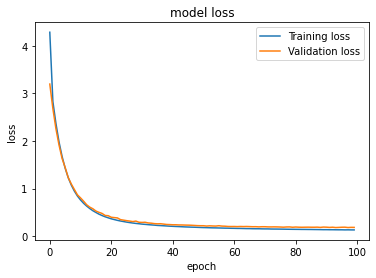

In [33]:
from matplotlib import pyplot as plt

# # 정확도 시각화
# plt.plot(history.history['acc'])
# plt.plot(history.history['val_acc'])
# plt.title('model accuracy')
# plt.ylabel('accuracy')
# plt.xlabel('epoch')
# plt.legend(['Training accuracy', 'Validation accuracy'], loc='lower right')
# plt.show()

# loss 시각화
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Training loss', 'Validation loss'], loc='upper right')
plt.show()

In [34]:
# 인코딩 결과로 발생할 상태값도 가져오기 위해 그를 반환할 모델 (encoder_model)
encoder_model = Model(encoder_inputs, encoder_states)

encoder_h_state = Input(shape=(hidden_units,))
encoder_c_state = Input(shape=(hidden_units,))

# 디코더 설계 시작
# 이전 시점의 상태를 보관할 텐서
decoder_state_input_h = Input(shape=(hidden_units,))
decoder_state_input_c = Input(shape=(hidden_units,))
decoder_states_inputs = [decoder_state_input_h, decoder_state_input_c]

# 훈련 때 사용했던 임베딩 층을 재사용
dec_emb2 = dec_emb_layer(decoder_inputs)

# 다음 단어 예측을 위해 이전 시점의 상태를 현 시점의 초기 상태로 사용
decoder_outputs2, state_h2, state_c2 = decoder_lstm(dec_emb2, initial_state=decoder_states_inputs)
decoder_states2 = [state_h2, state_c2]

# 모든 시점에 대해서 단어 예측
decoder_outputs2 = decoder_dense(decoder_outputs2)

# 수정된 디코더
decoder_model = Model(
    [decoder_inputs] + decoder_states_inputs,
    [decoder_outputs2] + decoder_states2)

In [35]:
def decode_sequence(input_seq):
  # 입력으로부터 인코더의 마지막 시점의 상태(은닉 상태, 셀 상태)를 얻음
    states_value = encoder_model.predict(input_seq)

  # <SOS>에 해당하는 정수 생성
    target_seq = np.zeros((1,1))
    target_seq[0, 0] = 2

    stop_condition = False
    decoded_sentence = []

  # stop_condition이 True가 될 때까지 루프 반복
  # 구현의 간소화를 위해서 이 함수는 배치 크기를 1로 가정합니다.
    while not stop_condition:
        # 이점 시점의 상태 states_value를 현 시점의 초기 상태로 사용
        output_words, h, c = decoder_model.predict([target_seq] + states_value)

        # 예측 결과를 단어로 변환
        predicted_word = inverse_places[np.argmax(output_words[0,0])]
        # print(predicted_word)

        # 현재 시점의 예측 단어를 예측 문장에 추가
        decoded_sentence.append(predicted_word)

        # <eos>에 도달하거나 정해진 길이를 넘으면 중단.
        if (predicted_word == 'end' or
            len(decoded_sentence) >= 10):
            stop_condition = True

        # 현재 시점의 예측 결과를 다음 시점의 입력으로 사용하기 위해 저장
        predicted_seq = np.zeros((1,1))
        predicted_seq[0, 0] = np.argmax(output_words[0,0])

        # 현재 시점의 상태를 다음 시점의 상태로 사용하기 위해 저장
        states_value = [h, c]

    return decoded_sentence

In [36]:
# !pip install import_ipynb 

importing Jupyter notebook from seq_into_int_vectors.ipynb
7874
 
['-', 'start', 'end', 'Ap0001', 'Ap0002', 'Ap0003', 'Ap0004', 'Ap0005', 'Ap0006', 'Ap0007', 'Ap0008', 'Ap0009', 'Ap0010', 'Ap0011', 'Ap0012', 'Ap0013', 'Ap0014', 'Ap0015', 'Ap0016', 'Ap0017', 'Ap0018', 'Ap0019', 'Ag0001', 'Ag0002', 'Ag0003', 'Ag0004', 'Yx0001', 'Yx0002', 'Yx0003', 'Yx0004', 'Yx0005', 'Yx0006', 'Yx0007', 'Yx0008', 'Yx0009', 'Yx0010', 'Yx0011', 'Yx0012', 'Yx0013', 'Yx0014', 'Yx0015', 'Yx0016', 'Yx0017', 'Yx0018', 'Yx0019', 'Yx0020', 'Yx0021', 'Yx0022', 'Yx0023', 'Yx0024', 'Yx0025', 'Yx0026', 'Yx0027', 'Yx0028', 'Yx0029', 'Yx0030', 'Yx0031', 'Qx0001', 'Qx0002', 'Qx0003', 'Qx0004', 'Qx0005', 'Qx0006', 'Qx0007', 'Qx0008', 'Qx0009', 'Qx0010', 'Qx0011', 'Qx0012', 'Qx0013', 'Qx0014', 'Qx0015', 'Qx0016', 'Qx0017', 'Qx0018', 'Qx0019', 'Qx0020', 'Qx0021', 'Qx0022', 'Qx0023', 'Qx0024', 'Qx0025', 'Qx0026', 'Qx0027', 'Qx0028', 'Qx0029', 'Qx0030', 'Qx0031', 'Qx0032', 'Qx0033', 'Qx0034', 'Qx0035', 'Qx0036', 'Qx0037', 'Q

<string>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\User\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


96.67721063982746 76.0 1007


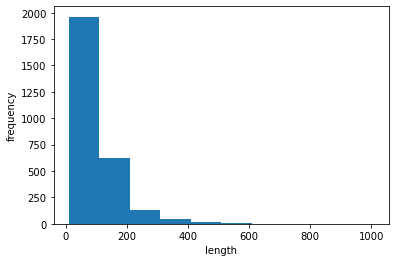

In [37]:
import import_ipynb
import seq_into_int_vectors as seqvec

In [38]:
print(seqvec.places_dict)

{'-': 1, 'start': 2, 'end': 3, 'Ap0001': 4, 'Ap0002': 5, 'Ap0003': 6, 'Ap0004': 7, 'Ap0005': 8, 'Ap0006': 9, 'Ap0007': 10, 'Ap0008': 11, 'Ap0009': 12, 'Ap0010': 13, 'Ap0011': 14, 'Ap0012': 15, 'Ap0013': 16, 'Ap0014': 17, 'Ap0015': 18, 'Ap0016': 19, 'Ap0017': 20, 'Ap0018': 21, 'Ap0019': 22, 'Ag0001': 23, 'Ag0002': 24, 'Ag0003': 25, 'Ag0004': 26, 'Yx0001': 27, 'Yx0002': 28, 'Yx0003': 29, 'Yx0004': 30, 'Yx0005': 31, 'Yx0006': 32, 'Yx0007': 33, 'Yx0008': 34, 'Yx0009': 35, 'Yx0010': 36, 'Yx0011': 37, 'Yx0012': 38, 'Yx0013': 39, 'Yx0014': 40, 'Yx0015': 41, 'Yx0016': 42, 'Yx0017': 43, 'Yx0018': 44, 'Yx0019': 45, 'Yx0020': 46, 'Yx0021': 47, 'Yx0022': 48, 'Yx0023': 49, 'Yx0024': 50, 'Yx0025': 51, 'Yx0026': 52, 'Yx0027': 53, 'Yx0028': 54, 'Yx0029': 55, 'Yx0030': 56, 'Yx0031': 57, 'Qx0001': 58, 'Qx0002': 59, 'Qx0003': 60, 'Qx0004': 61, 'Qx0005': 62, 'Qx0006': 63, 'Qx0007': 64, 'Qx0008': 65, 'Qx0009': 66, 'Qx0010': 67, 'Qx0011': 68, 'Qx0012': 69, 'Qx0013': 70, 'Qx0014': 71, 'Qx0015': 72, 'Qx0016':

In [39]:
inverse_places = {v: k for k, v in seqvec.places_dict.items()}
print(inverse_places)

{1: '-', 2: 'start', 3: 'end', 4: 'Ap0001', 5: 'Ap0002', 6: 'Ap0003', 7: 'Ap0004', 8: 'Ap0005', 9: 'Ap0006', 10: 'Ap0007', 11: 'Ap0008', 12: 'Ap0009', 13: 'Ap0010', 14: 'Ap0011', 15: 'Ap0012', 16: 'Ap0013', 17: 'Ap0014', 18: 'Ap0015', 19: 'Ap0016', 20: 'Ap0017', 21: 'Ap0018', 22: 'Ap0019', 23: 'Ag0001', 24: 'Ag0002', 25: 'Ag0003', 26: 'Ag0004', 27: 'Yx0001', 28: 'Yx0002', 29: 'Yx0003', 30: 'Yx0004', 31: 'Yx0005', 32: 'Yx0006', 33: 'Yx0007', 34: 'Yx0008', 35: 'Yx0009', 36: 'Yx0010', 37: 'Yx0011', 38: 'Yx0012', 39: 'Yx0013', 40: 'Yx0014', 41: 'Yx0015', 42: 'Yx0016', 43: 'Yx0017', 44: 'Yx0018', 45: 'Yx0019', 46: 'Yx0020', 47: 'Yx0021', 48: 'Yx0022', 49: 'Yx0023', 50: 'Yx0024', 51: 'Yx0025', 52: 'Yx0026', 53: 'Yx0027', 54: 'Yx0028', 55: 'Yx0029', 56: 'Yx0030', 57: 'Yx0031', 58: 'Qx0001', 59: 'Qx0002', 60: 'Qx0003', 61: 'Qx0004', 62: 'Qx0005', 63: 'Qx0006', 64: 'Qx0007', 65: 'Qx0008', 66: 'Qx0009', 67: 'Qx0010', 68: 'Qx0011', 69: 'Qx0012', 70: 'Qx0013', 71: 'Qx0014', 72: 'Qx0015', 73: 'Qx00

In [40]:
# 원문의 정수 시퀀스를 텍스트 시퀀스로 변환
def seq_to_src(input_seq):
    sentence = []
    for encoded_word in input_seq:
        if(encoded_word != 0):
            sentence.append(inverse_places[encoded_word])
    return sentence

# 결과의 정수 시퀀스를 텍스트 시퀀스로 변환
def seq_to_tar(input_seq):
    sentence = []
    for encoded_word in input_seq:
        if(encoded_word != 0 and encoded_word != seqvec.places_dict['start'] and encoded_word != seqvec.places_dict['end']):
            sentence.append(inverse_places[encoded_word])
    return sentence

In [41]:
from collections import OrderedDict

encoder_input_less_repeat = []
decoder_input_less_repeat = []

for i in range(len(decoder_input_test)):
    trimmed = list(OrderedDict.fromkeys(decoder_input_test[i]))
    if len(trimmed) >= 3:
        decoder_input_less_repeat.append(i)   

print(decoder_input_less_repeat)
print(len(decoder_input_less_repeat))

[0, 2, 3, 8, 11, 18, 20, 21, 22, 24, 33, 34, 36, 37, 38, 39, 40, 45, 46, 48, 49, 52, 53, 54, 56, 61, 62, 71, 72, 74, 75, 76, 77, 78, 80, 81, 82, 83, 89, 96, 97, 98, 100, 101, 105, 106, 109, 114, 115, 117, 119, 120, 124, 126, 130, 131, 134, 142, 143, 144, 146, 150, 152, 153, 154, 158, 160, 161, 166, 168, 175, 177, 179, 181, 184, 185, 187, 194, 195, 200, 203, 205, 207, 208, 209, 210, 213, 216, 222, 223, 224, 225, 226, 230, 233, 234, 236, 237, 240, 247, 248, 251, 254, 255, 256, 257, 261, 262, 264, 267, 269, 270, 272, 273, 275, 278, 279, 281, 285, 286, 289, 290, 293, 296, 297, 304, 306, 308, 309, 314, 320, 321, 322, 323, 325, 330, 333, 334, 336, 337, 341, 342, 343, 344, 347, 349, 359, 361, 362, 363, 364, 370, 372, 377, 383, 384, 386, 387, 389, 390, 391, 394, 395, 398, 407, 408, 410, 411, 412, 417, 418, 420, 421, 426, 432, 433, 434, 435, 436, 439, 441, 443, 444, 448, 450, 451, 452, 453, 455, 456, 463, 467, 468, 469, 472, 476, 477, 478, 479, 480, 484, 485, 486, 494, 496, 497, 498, 500, 502, 

In [42]:
len(encoder_input_test)

863

In [43]:
def edit_dist(arr1, arr2):
    dp = [[0] * (len(arr2)+1) for _ in range(len(arr1) + 1)]
    for i in range(1, len(arr1)+1):
        dp[i][0] = i
    for j in range(1, len(arr2)+1):
        dp[0][j] = j

    for i in range(1, len(arr1)+1):
        for j in range(1, len(arr2)+1):
            if arr1[i-1] == arr2[j-1]:
                dp[i][j] = dp[i-1][j-1]

            else:
                dp[i][j] = min(dp[i-1][j-1], dp[i-1][j], dp[i][j-1]) + 1

    return dp[-1][-1]

In [44]:
# Mean Relatvie Error
def MRE(predicted_seq, target_seq):
    editDist = edit_dist(predicted_seq, target_seq)
    longerSeq = max(len(predicted_seq), len(target_seq))
    return editDist / longerSeq

In [45]:
def sequence_trim(temp_list):
    # trimmed list 생성하는 부분
    pointer = temp_list[0]
    
    cnt_list = []
    final_list = []
    final_list.append(pointer)
    cnt = 1
    
    for j in range(1, len(temp_list) + 1):
        # 비교해서 같으면 패스, 다르면 리스트에 넣음
        if j == len(temp_list):
            cnt_list.append(cnt)    
            break
        if pointer == temp_list[j]: 
            cnt += 1
            continue
        else:
            pointer = temp_list[j]
            final_list.append(pointer)
            cnt_list.append(cnt)
            cnt = 1
    return final_list

In [46]:
# Mean Relatvie Error

def MRE_trimmed(predicted_seq, target_seq):
    predicted_trimmed = sequence_trim(predicted_seq)
    target_trimmed = sequence_trim(target_seq)        
    editDist = edit_dist(predicted_trimmed, target_trimmed)
    longerSeq = max(len(predicted_seq), len(target_seq))
    return editDist / longerSeq

In [47]:
# Mean accuracy
def MA(predicted_seq, target_seq):
    set1 = set(predicted_seq)
    set2 = set(target_seq)
    correctPredictNum = len(set1 & set2)
    
    return correctPredictNum / len(set1)

In [48]:
mre_list = []
mre_trimmed_list = []
ma_list = []
target_trimmed = []
output_trimmed = []
test_results = []

good_results = []

seq_indices =  decoder_input_less_repeat

for seq_index in seq_indices:
    input_seq = encoder_input_test[seq_index: seq_index + 1]
    print(input_seq.shape)
    decoded_sentence = decode_sequence(input_seq)
    
    inputstr = ["입력 :"] + list(seq_to_src(encoder_input_test[seq_index]))
    target_trimmed.append(len(sequence_trim(list(seq_to_tar(decoder_input_test[seq_index])))))
    output_trimmed.append(len(sequence_trim(list(decoded_sentence)))) 
    targetstr = ["정답 :"] + list(seq_to_tar(decoder_input_test[seq_index]))
    outputstr = ["출력결과 :"] + list(decoded_sentence)
    test_results.append([inputstr, targetstr, outputstr])
    
    if(len(set(decoded_sentence)) >= 3 and len(set(seq_to_tar(decoder_input_test[seq_index]))) >= 3):
        good_results.append([inputstr, targetstr, outputstr])

    print(inputstr)
    print(targetstr)
    print(outputstr)
    mre_list.append(MRE(decoded_sentence, seq_to_tar(decoder_input_test[seq_index])))
    mre_trimmed_list.append(MRE_trimmed(decoded_sentence, seq_to_tar(decoder_input_test[seq_index])))
    ma_list.append(MA(decoded_sentence, seq_to_tar(decoder_input_test[seq_index])))
    print("-"*50)

(1, 15)
['입력 :', 'Sx0468', 'Sx0468', 'Sx0468', 'Sx0468', 'Sx0468', 'Sx0468', 'Sx0468', 'Sx0468', 'Sx0468', 'Sx0468', 'Sx0468', 'Sx0468', 'Sx0468', 'Sx0468', 'Sx0468']
['정답 :', 'Sx0468', 'Sx0468', 'Sx0468', 'Sx0468', 'Sx0468', '-', '-', '-', '-', '-']
['출력결과 :', 'Sx0468', 'Sx0468', '-', '-', '-', '-', '-', '-', '-', '-']
--------------------------------------------------
(1, 15)
['입력 :', 'Sx1164', 'Sx1164', 'Sx1164', 'Sx1164', 'Sx1164', 'Sx1164', 'Sx1164', 'Sx1164', 'Sx1164', 'Sx1164', '-', '-', '-', '-', '-']
['정답 :', '-', '-', '-', 'Sx1164', 'Sx1164', 'Sx1164', 'Sx1164', 'Sx1164', 'Sx1164', 'Sx1164']
['출력결과 :', '-', 'Sx1164', 'Sx1164', 'Sx1164', '-', '-', '-', '-', '-', '-']
--------------------------------------------------
(1, 15)
['입력 :', 'Rx1171', 'Rx1171', 'Rx1171', 'Rx1171', 'Rx1171', 'Rx1171', 'Rx1171', 'Rx1171', 'Rx1171', 'Rx1171', 'Rx1171', 'Rx1171', 'Rx1171', 'Rx1171', 'Rx1171']
['정답 :', 'Rx1171', 'Rx1171', '-', '-', '-', '-', '-', '-', '-', '-']
['출력결과 :', 'Rx1171', 'Rx1171

['입력 :', '-', 'St0047', 'St0047', 'St0047', 'St0047', '-', '-', '-', 'St0047', '-', '-', 'St0047', 'St0047', 'St0047', 'St0047']
['정답 :', 'St0047', '-', '-', '-', '-', '-', 'St0047', 'St0047', 'St0047', 'St0047']
['출력결과 :', 'St0047', 'St0047', '-', '-', '-', '-', '-', '-', '-', '-']
--------------------------------------------------
(1, 15)
['입력 :', '-', '-', '-', '-', '-', '-', '-', 'Sx1483', 'Sx1483', 'Sx1483', 'Sx1483', 'Sx1483', 'Sx1483', 'Sx1483', 'Sx1483']
['정답 :', 'Sx1483', 'Sx1483', '-', '-', '-', '-', '-', '-', '-', 'Sx1483']
['출력결과 :', 'Sx1483', 'Sx1483', '-', '-', '-', '-', '-', '-', '-', '-']
--------------------------------------------------
(1, 15)
['입력 :', 'Sx1483', 'Sx1483', 'Sx1483', 'Sx1483', 'Sx1483', 'Sx1483', 'Sx1483', 'Sx1483', 'Sx1483', 'Sx1483', '-', '-', '-', '-', '-']
['정답 :', '-', '-', 'Sx1483', 'Sx1483', '-', '-', '-', '-', '-', '-']
['출력결과 :', '-', 'Sx1483', '-', '-', '-', '-', '-', '-', '-', '-']
--------------------------------------------------
(1, 15)
[

['입력 :', '-', '-', '-', '-', '-', '-', '-', '-', '-', 'Rx1004', 'Rx1004', 'Rx1004', 'Rx1004', 'Rx1004', 'Rx1004']
['정답 :', 'Rx1004', 'Rx1004', '-', '-', '-', 'Rx1004', 'Rx1004', 'Rx1004', '-', '-']
['출력결과 :', 'Rx1004', 'Rx1004', 'Rx1004', 'Rx1004', 'Rx1004', 'Rx1004', 'Rx1004', '-', '-', '-']
--------------------------------------------------
(1, 15)
['입력 :', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-']
['정답 :', '-', 'Sx1483', 'Sx1483', 'Sx1483', 'Sx1483', 'Sx1483', 'Sx1483', 'Sx1483', 'Sx1483', 'Sx1483']
['출력결과 :', '-', 'Rx2736', 'Ux0004', 'Bs0114', 'Bs0114', '-', '-', '-', '-', '-']
--------------------------------------------------
(1, 15)
['입력 :', '-', '-', '-', '-', 'Sx1873', 'Sx1873', 'Sx1873', 'Sx1873', '-', '-', '-', '-', '-', 'Rx2153', 'Rx2153']
['정답 :', '-', '-', 'Rx2153', '-', 'Rx2153', 'Rx2153', 'Rx2153', '-', '-', '-']
['출력결과 :', '-', 'Rx2153', 'Rx2153', '-', '-', 'Ux0021', '-', '-', '-', '-']
--------------------------------------------------

['입력 :', 'Sx0001', 'Sx0001', 'Sx0001', 'Sx0001', 'Sx0001', 'Sx0001', 'Sx0001', 'Sx0001', 'Sx0001', 'Sx0001', 'Sx0001', 'Sx0001', 'Sx0001', 'Sx0001', 'Sx0001']
['정답 :', 'Sx0001', 'Sx0001', 'Sx0001', 'Sx0001', '-', '-', '-', 'Rx0004', 'Rx0004', 'Rx0004']
['출력결과 :', 'Sx0001', 'Sx0001', 'Sx0001', 'Sx0001', 'Sx0001', 'Sx0001', 'Sx0001', 'Sx0001', 'Sx0001', 'Sx0001']
--------------------------------------------------
(1, 15)
['입력 :', 'Ux0224', 'Ux0224', 'Ux0224', 'Ux0224', 'Ux0224', 'Ux0224', 'Ux0224', 'Ux0224', '-', '-', '-', '-', '-', '-', 'Sx1071']
['정답 :', 'Sx1071', 'Sx1071', 'Sx1071', '-', '-', '-', '-', '-', '-', '-']
['출력결과 :', 'Ux0004', 'Sx1638', 'Sx1638', 'Sx1638', 'Sx1638', 'Sx1638', '-', '-', '-', '-']
--------------------------------------------------
(1, 15)
['입력 :', '-', 'Ux0003', 'Ux0003', 'Ux0003', 'Ux0003', 'Ux0003', 'Ux0003', 'Ux0003', '-', '-', '-', '-', '-', '-', '-']
['정답 :', '-', '-', '-', '-', '-', '-', '-', '-', 'Ux0003', 'Ux0003']
['출력결과 :', '-', 'Ux0003', 'Ux0003', 

['입력 :', '-', '-', '-', '-', '-', '-', '-', 'Rx1004', 'Rx1004', 'Rx1004', 'Rx1004', 'Rx1004', 'Rx1004', 'Rx1004', 'Rx1004']
['정답 :', '-', '-', '-', 'Rx1004', 'Rx1004', 'Rx1004', '-', '-', '-', '-']
['출력결과 :', 'Rx1004', 'Rx1004', 'Rx1004', '-', '-', '-', '-', '-', '-', '-']
--------------------------------------------------
(1, 15)
['입력 :', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', 'Rx0472']
['정답 :', 'Rx0472', 'Rx0472', 'Rx0472', 'Rx0472', 'Rx0472', 'Rx0472', 'Rx0472', 'Rx0472', 'Rx0472', '-']
['출력결과 :', 'Sx0001', 'Bs0114', 'Bs0114', 'Bs0114', 'Bs0114', '-', '-', '-', '-', '-']
--------------------------------------------------
(1, 15)
['입력 :', '-', '-', '-', '-', '-', 'Sx0001', 'Sx0001', 'Sx0001', 'Sx0001', 'Sx0001', 'Sx0001', 'Sx0001', 'Sx0001', 'Sx0001', 'Sx0001']
['정답 :', 'Sx0001', 'Sx0001', 'Sx0001', 'Sx0001', 'Sx0001', 'Sx0001', 'Sx0001', '-', '-', '-']
['출력결과 :', 'Sx0001', 'Sx0001', 'Sx0001', 'Sx0001', 'Sx0001', 'Sx0001', 'Sx0001', 'Sx0001', 'Sx0001', 

['입력 :', 'Rx0031', 'Rx0031', 'Rx0031', 'Rx0031', 'Rx0031', 'Sx0156', 'Sx0156', 'Sx0156', 'Sx0156', 'Sx0156', '-', '-', 'Sx2128', 'Sx2128', 'Sx2128']
['정답 :', 'Sx2128', 'Sx2128', 'Sx2128', 'Sx2128', 'Sx2128', 'Sx2128', 'Sx2128', '-', '-', '-']
['출력결과 :', 'Sx2128', 'Sx2128', 'Sx2128', 'Sx2128', 'Sx2128', 'Sx2128', 'Sx2128', 'Sx2128', 'Sx2128', 'Sx2128']
--------------------------------------------------
(1, 15)
['입력 :', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', 'Lx0127', 'Lx0127', 'Lx0127', 'Lx0127', 'Lx0127']
['정답 :', 'Lx0127', 'Lx0127', 'Lx0127', 'Lx0127', 'Lx0127', '-', '-', '-', '-', '-']
['출력결과 :', 'Lx0127', 'Lx0127', 'Lx0127', 'Lx0127', 'Lx0127', 'Lx0422', 'Lx0422', 'Lx0422', 'Lx0422', '-']
--------------------------------------------------
(1, 15)
['입력 :', 'Nc0016', 'Nc0016', 'Nc0016', 'Nc0016', 'Nc0016', 'Nc0016', '-', '-', '-', '-', '-', '-', '-', '-', '-']
['정답 :', '-', '-', '-', '-', 'Nc0016', 'Nc0016', 'Nc0016', 'Nc0016', 'Nc0016', 'Rx1820']
['출력결과 :', '-', '-', '-', 

['입력 :', 'Ux0037', 'Ux0037', 'Ux0037', 'Ux0037', 'Ux0037', 'Ux0037', 'Ux0037', 'Ux0037', '-', '-', '-', '-', '-', '-', 'Ux0037']
['정답 :', 'Ux0037', 'Ux0037', '-', '-', '-', '-', '-', '-', '-', '-']
['출력결과 :', 'Ux0037', 'Ux0037', 'Ux0037', '-', '-', '-', '-', '-', '-', '-']
--------------------------------------------------
(1, 15)
['입력 :', 'Sx0001', 'Sx0001', 'Sx0001', 'Sx0001', 'Sx0001', 'Sx0001', 'Sx0001', 'Sx0001', 'Sx0001', 'Sx0001', 'Sx0001', 'Sx0001', 'Sx0001', 'Sx0001', 'Sx0001']
['정답 :', 'Sx0001', 'Sx0001', 'Sx0001', 'Sx0001', 'Sx0001', 'Sx0001', '-', '-', '-', '-']
['출력결과 :', 'Sx0001', 'Sx0001', 'Sx0001', 'Sx0001', 'Sx0001', 'Sx0001', 'Sx0001', 'Sx0001', 'Sx0001', 'Sx0001']
--------------------------------------------------
(1, 15)
['입력 :', 'Rx0372', 'Rx0372', 'Rx0372', 'Rx0372', 'Rx0372', 'Rx0372', 'Rx0372', 'Rx0372', 'Rx0372', 'Rx0372', 'Rx0372', 'Rx0372', 'Rx0372', 'Rx0372', 'Rx0372']
['정답 :', 'Rx0372', 'Rx0372', 'Rx0372', 'Rx0372', 'Rx0372', 'Rx0372', '-', 'Sx1164', 'Sx116

['입력 :', 'Sx0001', 'Sx0001', 'Sx0001', 'Sx0001', 'Sx0001', 'Sx0001', 'Sx0001', 'Sx0001', 'Sx0001', 'Sx0001', 'Sx0001', 'Sx0001', 'Sx0001', 'Sx0001', 'Sx0001']
['정답 :', 'Sx0001', 'Sx0001', '-', '-', 'Rx0004', 'Rx0004', 'Rx0004', '-', '-', 'Rx0004']
['출력결과 :', 'Sx0001', 'Sx0001', 'Sx0001', 'Sx0001', 'Sx0001', 'Sx0001', 'Sx0001', 'Sx0001', 'Sx0001', 'Sx0001']
--------------------------------------------------
(1, 15)
['입력 :', 'Sx1164', 'Sx1164', 'Sx1164', 'Sx1164', 'Sx1164', 'Sx1164', 'Sx1164', 'Sx1164', 'Sx1164', '-', '-', '-', '-', '-', '-']
['정답 :', '-', 'Sx1164', 'Sx1164', 'Sx1164', 'Sx1164', 'Sx1164', 'Sx1164', 'Sx1164', 'Sx1164', 'Sx1164']
['출력결과 :', '-', 'Bs0108', 'Bs0108', 'Bs0108', 'Bs0108', '-', '-', '-', '-', '-']
--------------------------------------------------
(1, 15)
['입력 :', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-']
['정답 :', '-', '-', 'Sx2126', 'Sx2126', 'Sx2126', 'Sx2126', 'Sx2126', 'Sx2126', 'Sx2126', 'Sx2126']
['출력결과 :', '-', 'Rx2736', 

['입력 :', 'Rx2440', 'Rx2440', 'Rx2440', 'Rx2440', 'Rx2440', 'Rx2440', 'Rx2440', 'Rx2440', 'Rx2440', 'Rx2440', 'Rx2440', 'Rx2440', 'Rx2440', 'Rx2440', 'Rx2440']
['정답 :', 'Rx2440', 'Rx2440', 'Rx2440', 'Rx2440', 'Rx2440', 'Rx2440', 'Rx2440', '-', 'Kx0065', 'Kx0065']
['출력결과 :', 'Rx2440', 'Rx2440', 'Rx2440', 'Rx2440', 'Rx2440', 'Rx2440', '-', '-', 'Sx2290', 'Sx2290']
--------------------------------------------------
(1, 15)
['입력 :', 'Ux0004', 'Ux0004', 'Ux0004', 'Ux0004', 'Ux0004', 'Ux0004', 'Ux0004', 'Ux0004', 'Ux0004', 'Ux0004', 'Ux0004', 'Ux0004', 'Ux0004', 'Ux0004', 'Ux0004']
['정답 :', 'Ux0004', 'Ux0004', '-', '-', '-', 'St0001', 'St0001', 'St0001', 'St0001', '-']
['출력결과 :', 'Ux0004', 'Ux0004', 'Ux0004', 'Ux0020', '-', '-', '-', '-', '-', '-']
--------------------------------------------------
(1, 15)
['입력 :', 'Rx2479', 'Rx2479', 'Rx2479', 'Rx2479', 'Rx2479', 'Rx2479', 'Rx2479', 'Rx2479', 'Rx2479', 'Rx2479', 'Rx2479', 'Rx2479', '-', '-', '-']
['정답 :', '-', '-', '-', '-', '-', '-', 'Rx022

['입력 :', '-', 'Hc0088', 'Hc0088', 'Hc0088', '-', '-', '-', 'Sx2166', 'Sx2166', 'Sx2166', 'Sx2166', 'Sx2166', 'Sx2166', 'Sx2166', 'Sx2166']
['정답 :', '-', '-', '-', '-', '-', '-', '-', 'Sx2166', '-', 'Hc0089']
['출력결과 :', 'Sx2166', 'Sx2166', 'Sx2166', 'Sx2166', '-', '-', '-', '-', '-', '-']
--------------------------------------------------
(1, 15)
['입력 :', 'Rx0160', 'Rx0160', 'Rx0160', 'Rx0160', 'Rx0160', 'Rx0160', 'Rx0160', 'Rx0160', 'Rx0160', 'Rx0160', 'Rx0160', 'Rx0160', '-', '-', '-']
['정답 :', '-', '-', '-', '-', '-', '-', 'Sx0125', '-', '-', 'Sx0087']
['출력결과 :', '-', '-', 'Rx0160', 'Rx0160', 'Rx0160', 'Rx0160', '-', '-', 'Rx0160', 'Rx0160']
--------------------------------------------------
(1, 15)
['입력 :', 'Rx0343', 'Rx0343', 'Rx0343', 'Rx0343', 'Rx0343', 'Rx0343', 'Rx0343', 'Rx0343', 'Rx0343', 'Rx0343', 'Rx0343', 'Rx0343', 'Rx0343', 'Rx0343', 'Rx0343']
['정답 :', 'Rx0343', 'Rx0343', 'Rx0343', 'Rx0343', '-', '-', '-', '-', '-', '-']
['출력결과 :', 'Rx0343', 'Rx0343', '-', '-', '-', '-', 

['입력 :', 'Sx0005', 'Sx0005', 'Sx0005', 'Sx0005', 'Sx0005', 'Sx0005', 'Sx0005', 'Sx0005', 'Sx0005', 'Sx0005', 'Sx0005', 'Sx0005', 'Sx0005', 'Sx0005', 'Sx0005']
['정답 :', 'Sx0005', 'Sx0005', 'Sx0005', 'Sx0005', 'Sx0005', 'Sx0005', 'Sx0005', 'Sx0005', '-', '-']
['출력결과 :', 'Sx0005', 'Sx0005', 'Sx0005', 'Sx2320', 'Sx2320', 'Sx2320', 'Sx2320', 'Sx2320', 'Sx2320', 'Sx2320']
--------------------------------------------------
(1, 15)
['입력 :', 'Rx0618', 'Rx0618', 'Rx0618', 'Rx0618', 'Rx0618', 'Rx0618', 'Rx0618', 'Rx0618', 'Rx0618', 'Rx0618', 'Rx0618', 'Rx0618', 'Rx0618', 'Rx0618', 'Rx0618']
['정답 :', 'Rx0618', 'Rx0618', 'Rx0618', 'Rx0618', 'Rx0618', '-', '-', '-', '-', '-']
['출력결과 :', 'Rx0618', 'Sx0486', 'Sx0486', 'Sx0486', 'Sx0486', 'Sx0486', 'Sx0486', 'Sx0486', 'Sx0486', 'Sx0486']
--------------------------------------------------
(1, 15)
['입력 :', 'Rx0577', 'Rx0577', 'Rx0577', 'Rx0577', 'Rx0577', 'Rx0577', 'Rx0577', 'Rx0577', 'Rx0577', 'Rx0577', 'Rx0577', 'Rx0577', 'Rx0577', 'Rx0577', 'Rx0577']


['입력 :', 'Lx0085', 'Lx0085', 'Lx0085', 'Lx0085', 'Lx0085', 'Lx0085', 'Lx0085', 'Lx0085', 'Lx0085', '-', '-', '-', '-', '-', '-']
['정답 :', '-', '-', '-', '-', '-', '-', '-', '-', 'Lx0085', 'Lx0085']
['출력결과 :', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-']
--------------------------------------------------
(1, 15)
['입력 :', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', 'Nc0016', 'Nc0016', 'Nc0016']
['정답 :', '-', '-', 'Nc0016', 'Nc0016', 'Nc0016', 'Nc0016', 'Nc0016', 'Nc0016', 'Nc0016', 'Nc0016']
['출력결과 :', 'Nc0016', 'Nc0016', 'Rx1820', '-', '-', '-', '-', '-', '-', '-']
--------------------------------------------------
(1, 15)
['입력 :', 'Ux0004', 'Ux0004', 'Ux0004', 'Ux0004', 'Ux0004', 'Ux0004', 'Ux0004', 'Ux0004', '-', '-', '-', '-', '-', 'Rx0004', 'Rx0004']
['정답 :', 'Rx0004', 'Rx0004', 'Rx0004', 'Rx0004', '-', '-', '-', '-', '-', '-']
['출력결과 :', 'Rx0004', 'Rx0004', 'Rx0004', 'Rx0004', 'Rx1383', 'Rx1383', 'Rx1383', 'Rx1383', 'Rx1383', 'Rx1383']
-------------------------

['입력 :', 'Ux0223', 'Ux0223', 'Ux0223', 'Ux0223', 'Ux0223', 'Ux0223', 'Ux0223', 'Ux0223', 'Ux0223', 'Ux0223', 'Ux0223', 'Ux0223', 'Ux0223', 'Ux0223', 'Ux0223']
['정답 :', 'Ux0223', '-', '-', '-', 'Tx0166', 'Tx0166', 'Tx0166', '-', '-', '-']
['출력결과 :', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-']
--------------------------------------------------
(1, 15)
['입력 :', 'Lx0052', 'Lx0052', 'Lx0052', 'Lx0052', 'Lx0052', 'Lx0052', 'Lx0052', 'Lx0052', 'Lx0052', '-', '-', '-', '-', '-', '-']
['정답 :', '-', '-', '-', 'Tg0001', 'Tg0001', 'Tg0001', 'Tg0001', 'Tg0001', 'Tg0001', 'Tg0001']
['출력결과 :', '-', '-', 'Tg0001', 'Tg0001', 'Tg0001', 'Lx0052', 'Lx0052', 'Lx0052', '-', '-']
--------------------------------------------------
(1, 15)
['입력 :', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', 'Rx1803', 'Rx1803', 'Rx1803', 'Rx1803', '-']
['정답 :', '-', 'Rx0015', 'Rx0015', 'Rx0015', '-', '-', '-', '-', '-', '-']
['출력결과 :', '-', 'Rx0015', 'Rx0015', 'Rx0015', 'Rx0015', 'Rx2792', 'Rx2792', '-', '-', '-']


['입력 :', '-', 'Ux0037', 'Ux0037', 'Ux0037', 'Ux0037', 'Ux0037', 'Ux0037', 'Ux0037', 'Ux0037', '-', 'Lx0005', 'Lx0005', 'Lx0005', 'Lx0005', 'Lx0005']
['정답 :', 'Lx0005', '-', '-', '-', '-', '-', '-', 'Ux0037', 'Ux0037', 'Ux0037']
['출력결과 :', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-']
--------------------------------------------------
(1, 15)
['입력 :', 'Rx0314', 'Rx0314', 'Rx0314', 'Rx0314', 'Rx0314', 'Rx0314', 'Rx0314', 'Rx0314', 'Rx0314', 'Rx0314', 'Rx0314', 'Rx0314', 'Rx0314', 'Rx0314', '-']
['정답 :', 'Kx0002', '-', 'Rx0025', 'Rx0025', 'Rx0025', 'Rx0025', 'Rx0025', 'Rx0025', '-', '-']
['출력결과 :', 'Kx0002', 'Rx0314', 'Rx0314', 'Rx0314', 'Rx0314', 'Rx0314', 'Rx0314', 'Rx0314', 'Rx0314', 'Rx0314']
--------------------------------------------------
(1, 15)
['입력 :', '-', '-', '-', 'Sx2322', 'Sx2322', 'Sx2322', 'Sx2322', 'Sx2322', 'Sx2322', 'Sx2322', 'Sx2322', 'Sx2322', 'Sx2322', 'Sx2322', 'Sx2322']
['정답 :', '-', '-', 'Ux0261', 'Ux0261', 'Ux0261', 'Ux0261', 'Ux0261', 'Ux0261', 'Ux0261', '

['입력 :', 'Sx0032', '-', '-', '-', '-', '-', '-', 'Bs0004', 'Bs0004', 'Bs0004', 'Bs0004', 'Bs0004', 'Bs0004', 'Bs0004', 'Bs0004']
['정답 :', 'Bs0004', 'Bs0004', 'Bs0004', 'Bs0004', 'Bs0004', 'Bs0004', '-', '-', '-', '-']
['출력결과 :', 'Bs0004', 'Bs0004', 'Bs0004', 'Bs0004', 'Rx0357', 'Rx0357', '-', '-', '-', '-']
--------------------------------------------------
(1, 15)
['입력 :', 'Lx0239', 'Lx0239', 'Lx0239', '-', '-', '-', '-', '-', '-', '-', 'Sx1035', 'Sx1035', '-', '-', '-']
['정답 :', 'Sx1035', 'Sx1035', '-', 'Sx0551', '-', 'Sx0551', 'Sx0551', 'Sx0551', 'Sx0551', '-']
['출력결과 :', '-', 'Sx1035', 'Sx1035', '-', '-', '-', '-', '-', '-', '-']
--------------------------------------------------
(1, 15)
['입력 :', 'Rx0509', 'Rx0509', 'Rx0509', 'Rx0509', 'Rx0509', 'Rx0509', 'Rx0509', 'Rx0509', 'Rx0509', 'Rx0509', 'Rx0509', 'Rx0509', 'Rx0509', 'Rx0509', 'Rx0509']
['정답 :', 'Rx0509', 'Rx0509', '-', '-', '-', '-', '-', '-', '-', '-']
['출력결과 :', 'Rx0509', 'Rx0509', '-', '-', '-', '-', '-', '-', '-', '-']


['입력 :', 'Sx0045', 'Sx0045', 'Sx0045', 'Sx0045', 'Sx0045', 'Sx0045', 'Sx0045', 'Sx0045', 'Sx0045', 'Sx0045', 'Sx0045', 'Sx0045', 'Sx0045', 'Sx0045', 'Sx0045']
['정답 :', 'Sx0045', 'Sx0045', 'Sx0045', 'Sx0045', 'Sx0045', 'Sx0045', 'Sx0045', '-', '-', '-']
['출력결과 :', 'Sx0045', 'Sx0045', 'Sx0045', 'Sx0045', 'Sx0045', 'Sx0045', 'Sx0045', '-', '-', '-']
--------------------------------------------------
(1, 15)
['입력 :', '-', '-', '-', '-', '-', '-', '-', 'Sx2322', 'Sx2322', 'Sx2322', 'Sx2322', 'Sx2322', 'Sx2322', 'Sx2322', 'Sx2322']
['정답 :', 'Sx2322', 'Sx2322', 'Sx2322', 'Sx2322', '-', '-', 'Ux0261', 'Ux0261', 'Ux0261', 'Ux0261']
['출력결과 :', 'Sx2322', 'Sx2322', 'Sx2322', 'Sx2322', 'Ux0298', 'Ux0298', 'Ux0298', 'Ux0298', 'Ux0298', 'Ux0298']
--------------------------------------------------
(1, 15)
['입력 :', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-']
['정답 :', '-', '-', '-', '-', '-', '-', 'St0069', '-', '-', '-']
['출력결과 :', '-', 'Rx2736', 'Ux0004', 'Bs0114', 'Bs01

In [49]:
# 문자열 시퀀스를 정수 시퀀스로 바꿈
def seq_to_vec(input_seq):
    sequence = []
    for loc in input_seq:
        sequence.append(seqvec.places_dict[loc])
    return sequence

In [50]:
# target trimmed
print("target trimmed 최댓값 :" , max(target_trimmed))
print("target trimmed 최솟값 :" , min(target_trimmed))
print("target trimmed 평균 :" , np.mean(np.array(target_trimmed)))
print("target trimmed 표준편차 :" , np.std(np.array(target_trimmed)))

target trimmed 최댓값 : 6
target trimmed 최솟값 : 2
target trimmed 평균 : 2.6121883656509697
target trimmed 표준편차 : 0.8802328626540938


In [51]:
output_trimmed

[2,
 3,
 2,
 1,
 3,
 2,
 2,
 1,
 2,
 2,
 5,
 3,
 2,
 5,
 3,
 1,
 3,
 5,
 3,
 2,
 2,
 1,
 5,
 2,
 2,
 3,
 1,
 2,
 2,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 6,
 2,
 4,
 5,
 5,
 2,
 3,
 2,
 2,
 2,
 5,
 5,
 2,
 3,
 2,
 4,
 2,
 3,
 5,
 5,
 2,
 1,
 2,
 3,
 1,
 5,
 5,
 4,
 2,
 2,
 2,
 3,
 5,
 1,
 3,
 3,
 5,
 3,
 1,
 3,
 2,
 2,
 3,
 4,
 4,
 2,
 2,
 2,
 1,
 2,
 2,
 3,
 2,
 2,
 3,
 1,
 2,
 3,
 1,
 2,
 2,
 5,
 1,
 1,
 2,
 5,
 1,
 4,
 2,
 4,
 2,
 3,
 3,
 2,
 4,
 5,
 2,
 2,
 3,
 1,
 3,
 1,
 3,
 5,
 2,
 5,
 1,
 3,
 2,
 1,
 4,
 2,
 2,
 4,
 2,
 1,
 2,
 2,
 1,
 2,
 3,
 5,
 2,
 1,
 5,
 4,
 2,
 2,
 2,
 4,
 2,
 1,
 2,
 3,
 1,
 3,
 3,
 5,
 3,
 2,
 2,
 2,
 3,
 2,
 5,
 1,
 1,
 3,
 5,
 1,
 1,
 2,
 4,
 2,
 2,
 3,
 3,
 2,
 3,
 5,
 2,
 3,
 2,
 5,
 1,
 2,
 5,
 2,
 3,
 2,
 3,
 3,
 1,
 3,
 2,
 1,
 3,
 2,
 2,
 1,
 4,
 1,
 3,
 2,
 1,
 3,
 2,
 5,
 2,
 2,
 1,
 3,
 2,
 2,
 4,
 2,
 5,
 2,
 5,
 2,
 3,
 2,
 5,
 1,
 3,
 2,
 2,
 5,
 2,
 3,
 2,
 3,
 5,
 5,
 2,
 2,
 2,
 2,
 2,
 1,
 5,
 2,
 2,
 1,
 1,
 3,
 3,
 4,
 1,
 5,
 2,
 2,
 2,
 1,


In [52]:
# 초기 경로 데이터
import math 
import time 
start = time.time() 


input_seq_str = np.array(['-', '-', '-', 'Bs0114', 'Bs0114', 'Bs0114', 'Bs0114', 'Bs0114', 'Bs0114', 'Bs0114', 'Bs0114',\
             'Sx0049', 'Sx0049', 'Sx0049', 'Sx0049'])
input_seq = seq_to_vec(input_seq_str)
input_seq = np.reshape(input_seq, (1, 15))

# 정답 (실제 적용에서는 정답이 없으나 이 경우 정확도 비교를 위해 정답 가져옴)
target_seq_str = np.array(['Sx0049', 'Sx0049', 'Sx0049', '-', '-', '-', '-', '-', '-', '-'])
target_seq = seq_to_vec(target_seq_str)
target_seq = np.reshape(target_seq, (1, 10))

# 모델에 넣어 이후 경로 추천 (예측)
decoded_sentence = decode_sequence(input_seq)
end = time.time()

inputstr = "입력 :" + str(input_seq_str)
targetstr = "정답 :" + str(target_seq_str)

outputstr = "출력결과 :" + str(decoded_sentence)

print(inputstr)
print(targetstr)
print(outputstr)
print("-"*50)
 
print(f"{end - start:.5f} sec")

입력 :['-' '-' '-' 'Bs0114' 'Bs0114' 'Bs0114' 'Bs0114' 'Bs0114' 'Bs0114'
 'Bs0114' 'Bs0114' 'Sx0049' 'Sx0049' 'Sx0049' 'Sx0049']
정답 :['Sx0049' 'Sx0049' 'Sx0049' '-' '-' '-' '-' '-' '-' '-']
출력결과 :['Sx0049', 'Sx0049', 'Sx0049', 'Sx0049', 'Sx0049', 'Sx0049', 'Sx0049', 'Sx0049', 'Sx0049', 'Sx0049']
--------------------------------------------------
0.86369 sec


In [53]:
for i in good_results:
    print(i)
    print(" ")

[['입력 :', 'Sx2290', 'Sx2290', 'Sx2290', 'Sx2290', 'Sx2290', 'Sx2290', 'Sx2290', 'Sx2290', 'Sx2290', 'Sx2290', 'Sx2290', 'Sx2290', 'Sx2290', '-', '-'], ['정답 :', 'Rx2743', 'Rx2743', 'Rx2743', 'Rx2743', '-', 'Sx2316', 'Sx2316', 'Sx2316', '-', '-'], ['출력결과 :', 'Rx2743', 'Rx2743', 'Sx2290', 'Sx2290', 'Sx2290', 'Sx2290', '-', '-', '-', '-']]
 
[['입력 :', 'Sx0005', 'Sx0005', '-', 'Sx0005', 'Sx0005', 'Sx0005', 'Sx0005', 'Sx0005', 'Sx0005', '-', '-', 'Sx0005', 'Sx0005', 'Sx0005', 'Sx0005'], ['정답 :', 'Sx0005', 'Sx0005', 'Sx0005', 'Sx0005', '-', '-', '-', 'Rx1037', 'Rx1037', '-'], ['출력결과 :', 'Sx0005', 'Sx0005', 'Sx0005', 'Sx2320', 'Sx2320', 'Sx2320', 'Sx2320', 'Sx2320', 'Sx2320', '-']]
 
[['입력 :', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-'], ['정답 :', 'Ta0002', 'Ta0002', 'Ta0002', 'Ta0002', '-', '-', '-', '-', 'Ta0003', '-'], ['출력결과 :', '-', 'Rx2736', 'Ux0004', 'Bs0114', 'Bs0114', '-', '-', '-', '-', '-']]
 
[['입력 :', '-', '-', 'Lx0073', 'Lx0073', 'Lx0073', 'Lx0073', 

In [54]:
ma_list

[1.0,
 1.0,
 1.0,
 1.0,
 0.3333333333333333,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.25,
 0.6666666666666666,
 1.0,
 0.25,
 0.6666666666666666,
 1.0,
 1.0,
 0.25,
 0.6666666666666666,
 0.5,
 1.0,
 1.0,
 0.25,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.5,
 1.0,
 1.0,
 0.4,
 1.0,
 0.5,
 0.25,
 0.25,
 1.0,
 1.0,
 0.5,
 1.0,
 1.0,
 0.25,
 0.6666666666666666,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.25,
 0.5,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.25,
 0.25,
 0.3333333333333333,
 1.0,
 1.0,
 1.0,
 1.0,
 0.25,
 1.0,
 0.3333333333333333,
 1.0,
 0.25,
 1.0,
 1.0,
 0.6666666666666666,
 1.0,
 1.0,
 1.0,
 0.5,
 0.6666666666666666,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.5,
 1.0,
 1.0,
 0.3333333333333333,
 1.0,
 1.0,
 1.0,
 0.25,
 1.0,
 1.0,
 1.0,
 0.25,
 1.0,
 0.6666666666666666,
 1.0,
 0.5,
 1.0,
 1.0,
 0.6666666666666666,
 1.0,
 0.25,
 0.25,
 1.0,
 1.0,
 0.6666666666666666,
 1.0,
 0.6666666666666666,
 1.0,
 0.6666666666666666,
 0.25,
 1.0,
 0.5,
 1.0,
 1.0,
 1.0,
 1.0,
 0

In [55]:
mre_trimmed_list

[0.0,
 0.1,
 0.0,
 0.1,
 0.2,
 0.0,
 0.0,
 0.1,
 0.0,
 0.0,
 0.4,
 0.2,
 0.0,
 0.4,
 0.2,
 0.1,
 0.0,
 0.4,
 0.2,
 0.1,
 0.1,
 0.1,
 0.3,
 0.1,
 0.1,
 0.0,
 0.2,
 0.1,
 0.1,
 0.1,
 0.2,
 0.3,
 0.0,
 0.1,
 0.0,
 0.0,
 0.4,
 0.1,
 0.2,
 0.4,
 0.4,
 0.0,
 0.0,
 0.2,
 0.1,
 0.2,
 0.4,
 0.1,
 0.0,
 0.1,
 0.0,
 0.5,
 0.0,
 0.1,
 0.4,
 0.3,
 0.0,
 0.1,
 0.0,
 0.0,
 0.1,
 0.4,
 0.4,
 0.3,
 0.0,
 0.0,
 0.2,
 0.1,
 0.3,
 0.2,
 0.2,
 0.1,
 0.4,
 0.1,
 0.2,
 0.1,
 0.1,
 0.3,
 0.1,
 0.2,
 0.3,
 0.0,
 0.0,
 0.0,
 0.1,
 0.0,
 0.0,
 0.2,
 0.0,
 0.0,
 0.1,
 0.1,
 0.1,
 0.2,
 0.1,
 0.2,
 0.1,
 0.4,
 0.2,
 0.2,
 0.0,
 0.4,
 0.1,
 0.2,
 0.0,
 0.3,
 0.0,
 0.1,
 0.1,
 0.0,
 0.4,
 0.4,
 0.0,
 0.0,
 0.1,
 0.1,
 0.1,
 0.2,
 0.2,
 0.5,
 0.1,
 0.3,
 0.1,
 0.2,
 0.2,
 0.2,
 0.3,
 0.0,
 0.0,
 0.2,
 0.0,
 0.2,
 0.0,
 0.3,
 0.1,
 0.0,
 0.2,
 0.4,
 0.0,
 0.1,
 0.3,
 0.2,
 0.0,
 0.0,
 0.2,
 0.1,
 0.1,
 0.1,
 0.0,
 0.1,
 0.2,
 0.2,
 0.2,
 0.4,
 0.1,
 0.2,
 0.0,
 0.2,
 0.1,
 0.0,
 0.4,
 0.3,
 0.4,
 0.2,
 0.4,
 0.1,
 0.2

In [56]:
# MRE trimmed
print("MRE trimmed 최댓값 :" , max(mre_trimmed_list))
print("MRE trimmed 최솟값 :" , min(mre_trimmed_list))
print("MRE trimmed 평균 :" , np.mean(np.array(mre_trimmed_list)))
print("MRE trimmed 표준편차 :" , np.std(np.array(mre_trimmed_list)))

MRE trimmed 최댓값 : 0.5
MRE trimmed 최솟값 : 0.0
MRE trimmed 평균 : 0.14321329639889196
MRE trimmed 표준편차 : 0.12747138700369673


[0.26869806 0.60110803 0.80886427 0.89750693 0.99168975 1.
 1.         1.         1.         1.         1.        ]


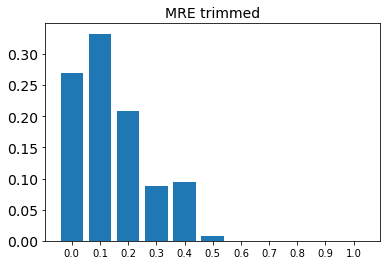

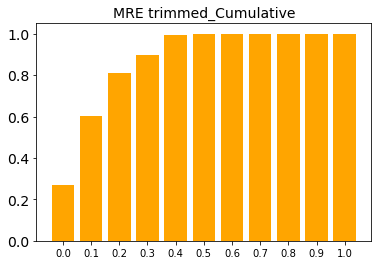

In [57]:
values = ['0.0', '0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8', '0.9', '1.0']
c0 = mre_trimmed_list.count(0.0) / len(mre_trimmed_list)
c1 = mre_trimmed_list.count(0.1) / len(mre_trimmed_list)
c2 = mre_trimmed_list.count(0.2) / len(mre_trimmed_list)
c3 = mre_trimmed_list.count(0.3) / len(mre_trimmed_list)
c4 = mre_trimmed_list.count(0.4) / len(mre_trimmed_list)
c5 = mre_trimmed_list.count(0.5) / len(mre_trimmed_list)
c6 = mre_trimmed_list.count(0.6) / len(mre_trimmed_list)
c7 = mre_trimmed_list.count(0.7) / len(mre_trimmed_list)
c8 = mre_trimmed_list.count(0.8) / len(mre_trimmed_list)
c9 = mre_trimmed_list.count(0.9) / len(mre_trimmed_list)
c10 = mre_trimmed_list.count(1.0) / len(mre_trimmed_list)
counts = np.array([c0, c1, c2, c3, c4, c5, c6, c7, c8, c9, c10])
counts_cumul = np.cumsum(counts)
print(counts_cumul)


plt.bar(values, counts)
plt.title('MRE trimmed', fontsize = 14)
plt.xticks(values)
plt.yticks(fontsize = 14)
# plt.savefig('MRE_clst1.jpg')
plt.show()

plt.bar(values, counts_cumul, color='orange')
plt.title('MRE trimmed_Cumulative', fontsize = 14)
plt.xticks(values)
plt.yticks(fontsize = 14)
# plt.savefig('MRE_cumulative_clst1.jpg')
plt.show()

In [58]:
# MRE trimmed 값이 평균 근처인 경우
for i in range(len(mre_trimmed_list)):
    if 0.0 <= mre_trimmed_list[i] <= 0.1:
        print(test_results[i][0])
        print(test_results[i][1])
        print(test_results[i][2])
        print("-"*50)

['입력 :', 'Sx0468', 'Sx0468', 'Sx0468', 'Sx0468', 'Sx0468', 'Sx0468', 'Sx0468', 'Sx0468', 'Sx0468', 'Sx0468', 'Sx0468', 'Sx0468', 'Sx0468', 'Sx0468', 'Sx0468']
['정답 :', 'Sx0468', 'Sx0468', 'Sx0468', 'Sx0468', 'Sx0468', '-', '-', '-', '-', '-']
['출력결과 :', 'Sx0468', 'Sx0468', '-', '-', '-', '-', '-', '-', '-', '-']
--------------------------------------------------
['입력 :', 'Sx1164', 'Sx1164', 'Sx1164', 'Sx1164', 'Sx1164', 'Sx1164', 'Sx1164', 'Sx1164', 'Sx1164', 'Sx1164', '-', '-', '-', '-', '-']
['정답 :', '-', '-', '-', 'Sx1164', 'Sx1164', 'Sx1164', 'Sx1164', 'Sx1164', 'Sx1164', 'Sx1164']
['출력결과 :', '-', 'Sx1164', 'Sx1164', 'Sx1164', '-', '-', '-', '-', '-', '-']
--------------------------------------------------
['입력 :', 'Rx1171', 'Rx1171', 'Rx1171', 'Rx1171', 'Rx1171', 'Rx1171', 'Rx1171', 'Rx1171', 'Rx1171', 'Rx1171', 'Rx1171', 'Rx1171', 'Rx1171', 'Rx1171', 'Rx1171']
['정답 :', 'Rx1171', 'Rx1171', '-', '-', '-', '-', '-', '-', '-', '-']
['출력결과 :', 'Rx1171', 'Rx1171', '-', '-', '-', '-', '

In [59]:
df2=pd.read_csv('places_info_id_0224.csv',encoding='cp949')
tyid=df2['type_id']
tyid=list(tyid)
lat=df2['lat']
lat=list(lat)
lng=df2['lng']
lng=list(lng)

In [60]:
! pip install haversine

In [61]:
from haversine import haversine

In [62]:
# MRE trimmed 값이 최댓값에 가까운 경우
for i in range(len(mre_trimmed_list)):
    distances = []
    if 0.4 <= mre_trimmed_list[i] <= 0.6:
        print(test_results[i][0])
        print(test_results[i][1])
        print(test_results[i][2])
        for j in range(1, 11):
            type_id1=test_results[i][1][j]
            type_id2=test_results[i][2][j]
            if(type_id1 == '-' or type_id2 == '-'):
                distances.append("-")
                continue

            gps1=(lat[tyid.index(type_id1)],lng[tyid.index(type_id1)])
            gps2=(lat[tyid.index(type_id2)],lng[tyid.index(type_id2)])

            dist=haversine(gps1,gps2,unit='m')
            distances.append(dist)
        print(distances)
        print("-"*50)

['입력 :', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-']
['정답 :', '-', '-', '-', 'Sx0016', 'Sx0016', 'Sx0016', 'Sx0016', 'Sx0016', 'Sx0016', 'Sx0016']
['출력결과 :', '-', 'Rx2736', 'Ux0004', 'Bs0114', 'Bs0114', '-', '-', '-', '-', '-']
['-', '-', '-', 4766.781231002782, 4766.781231002782, '-', '-', '-', '-', '-']
--------------------------------------------------
['입력 :', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-']
['정답 :', '-', '-', 'Sx1223', 'Sx1223', 'Sx1223', 'Sx1223', 'Sx1223', 'Sx1223', 'Sx1223', 'Sx1223']
['출력결과 :', '-', 'Rx2736', 'Ux0004', 'Bs0114', 'Bs0114', '-', '-', '-', '-', '-']
['-', '-', 13987.351893871337, 3727.2966766346367, 3727.2966766346367, '-', '-', '-', '-', '-']
--------------------------------------------------
['입력 :', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-']
['정답 :', '-', '-', '-', '-', '-', '-', '-', 'Rx2066', 'Rx2066', 'Rx2066']
['출력결과 :', '-', 'Rx2736', 'Ux0004', 'Bs011

In [63]:
# MRE
print("MRE 최댓값 :" , max(mre_list))
print("MRE 최솟값 :" , min(mre_list))
print("MRE 평균 :" , np.mean(np.array(mre_list)))
print("MRE 표준편차 :" , np.std(np.array(mre_list)))

MRE 최댓값 : 1.0
MRE 최솟값 : 0.0
MRE 평균 : 0.4617728531855955
MRE 표준편차 : 0.2703873561495499


In [64]:
# MRE 값이 좋은(작은) 경우
for i in range(len(mre_list)):
    distances = []
    if 0.0 <= mre_list[i] <= 0.2:
        print(test_results[i][0])
        print(test_results[i][1])
        print(test_results[i][2])
        for j in range(1, 11):
            type_id1=test_results[i][1][j]
            type_id2=test_results[i][2][j]
            if(type_id1 == '-' or type_id2 == '-'):
                distances.append('-')
                continue
            if(type_id1 == 'end' or type_id2 == 'end'):
                continue

            gps1=(lat[tyid.index(type_id1)],lng[tyid.index(type_id1)])
            gps2=(lat[tyid.index(type_id2)],lng[tyid.index(type_id2)])

            dist=haversine(gps1,gps2,unit='m')
            distances.append(dist)
        print(distances)
        print("-"*50)

['입력 :', 'Rx1171', 'Rx1171', 'Rx1171', 'Rx1171', 'Rx1171', 'Rx1171', 'Rx1171', 'Rx1171', 'Rx1171', 'Rx1171', 'Rx1171', 'Rx1171', 'Rx1171', 'Rx1171', 'Rx1171']
['정답 :', 'Rx1171', 'Rx1171', '-', '-', '-', '-', '-', '-', '-', '-']
['출력결과 :', 'Rx1171', 'Rx1171', '-', '-', '-', '-', '-', '-', '-', '-']
[0.0, 0.0, '-', '-', '-', '-', '-', '-', '-', '-']
--------------------------------------------------
['입력 :', 'Lx0005', 'Lx0005', 'Lx0005', 'Lx0005', 'Lx0005', 'Lx0005', '-', '-', '-', '-', '-', '-', 'Ux0037', 'Ux0037', 'Ux0037']
['정답 :', 'Ux0037', '-', '-', '-', '-', '-', '-', '-', '-', '-']
['출력결과 :', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-']
['-', '-', '-', '-', '-', '-', '-', '-', '-', '-']
--------------------------------------------------
['입력 :', 'Lx0089', 'Lx0089', 'Lx0089', 'Lx0089', 'Lx0089', 'Lx0089', 'Lx0089', 'Lx0089', 'Lx0089', 'Lx0089', 'Lx0089', 'Lx0089', 'Lx0089', 'Lx0089', 'Lx0089']
['정답 :', 'Lx0089', 'Lx0089', 'Lx0089', 'Lx0077', 'Lx0077', 'Lx0077', 'Lx0077', 'Lx00

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, '-', '-']
--------------------------------------------------
['입력 :', '-', '-', '-', 'Sx1564', 'Sx1564', 'Sx1564', 'Sx1564', 'Sx1564', 'Sx1564', 'Sx1564', 'Sx1564', 'Sx1564', 'Sx1564', 'Sx1564', 'Sx1564']
['정답 :', 'Sx1564', 'Sx1564', 'Sx1564', '-', '-', '-', '-', '-', '-', '-']
['출력결과 :', 'Sx1564', 'Sx1564', 'Sx1564', 'Sx1564', 'Sx1564', '-', '-', '-', '-', '-']
[0.0, 0.0, 0.0, '-', '-', '-', '-', '-', '-', '-']
--------------------------------------------------
['입력 :', '-', '-', '-', '-', '-', 'Sx1483', 'Sx1483', '-', '-', 'Sx1483', 'Sx1483', 'Sx1483', 'Sx1483', '-', '-']
['정답 :', '-', '-', 'Sx1483', '-', '-', '-', '-', '-', '-', '-']
['출력결과 :', '-', 'Rx2259', '-', '-', '-', '-', '-', '-', '-', '-']
['-', '-', '-', '-', '-', '-', '-', '-', '-', '-']
--------------------------------------------------
['입력 :', 'Sx0035', '-', '-', 'Rx0004', 'Rx0004', 'Rx0004', 'Rx0004', 'Rx0004', 'Rx0004', 'Rx0004', 'Rx0004', 'Rx0004', 'Rx0004', 'Rx0004', 'Rx0004

[0.0, 0.0, '-', '-', '-', '-', '-', '-', '-', '-']
--------------------------------------------------
['입력 :', 'Sx0035', 'Sx0035', 'Sx0035', 'Sx0035', '-', '-', 'Rx0004', 'Rx0004', 'Rx0004', 'Rx0004', 'Rx0004', 'Rx0004', 'Rx0004', 'Rx0004', 'Rx0004']
['정답 :', 'Rx0004', 'Rx0004', 'Rx0004', 'Rx0004', 'Rx0004', 'Rx0004', '-', '-', '-', '-']
['출력결과 :', 'Rx0004', 'Rx0004', 'Rx0004', 'Rx0004', 'Rx0004', 'Sx0087', '-', '-', '-', '-']
[0.0, 0.0, 0.0, 0.0, 0.0, 9442.744375530383, '-', '-', '-', '-']
--------------------------------------------------
['입력 :', '-', 'Rx1960', 'Rx1960', '-', 'Rx1960', 'Rx1960', '-', '-', '-', '-', '-', '-', '-', '-', '-']
['정답 :', '-', 'Lx0358', 'Lx0358', 'Lx0358', 'Lx0358', 'Lx0358', 'Lx0358', 'Lx0358', 'Lx0358', 'Lx0358']
['출력결과 :', '-', 'Lx0358', 'Lx0358', 'Lx0358', 'Lx0358', 'Lx0358', 'Lx0358', 'Lx0358', 'Lx0358', 'Lx0358']
['-', 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
--------------------------------------------------
['입력 :', 'Sx1164', 'Sx1164', '-', '-'

[0.0, 0.0, 0.0, 0.0, '-', '-', '-', '-', '-', '-']
--------------------------------------------------
['입력 :', 'Sx0005', 'Sx0005', 'Sx0005', 'Sx0005', 'Sx0005', 'Sx0005', 'Sx0005', 'Sx0005', 'Sx0005', 'Sx0005', 'Sx0005', 'Sx0005', 'Sx0005', 'Sx0005', '-']
['정답 :', '-', '-', 'Sx2320', 'Sx2320', 'Sx2320', 'Sx2320', 'Sx2320', 'Sx2320', 'Sx2320', 'Sx2320']
['출력결과 :', '-', '-', '-', 'Sx2320', 'Sx2320', 'Sx2320', 'Sx2320', 'Sx2320', 'Sx2320', '-']
['-', '-', '-', 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, '-']
--------------------------------------------------
['입력 :', 'Rx0031', 'Rx0031', 'Rx0031', 'Rx0031', 'Rx0031', 'Rx0031', 'Sx0156', 'Sx0156', 'Sx0156', 'Sx0156', 'Sx0156', '-', '-', 'Sx2128', 'Sx2128']
['정답 :', 'Sx2128', 'Sx2128', 'Sx2128', 'Sx2128', 'Sx2128', 'Sx2128', 'Sx2128', 'Sx2128', '-', '-']
['출력결과 :', 'Sx2128', 'Sx2128', 'Sx2128', 'Sx2128', 'Sx2128', 'Sx2128', 'Sx2128', 'Sx2128', 'Sx2128', 'Sx2128']
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, '-', '-']
------------------------------------------

In [65]:
# MRE 값이 평균 근처인 경우
for i in range(len(mre_list)):
    distances = []
    if 0.4 <= mre_list[i] <= 0.6:
        print(test_results[i][0])
        print(test_results[i][1])
        print(test_results[i][2])
        
        if len(test_results[i][2]) < 11:
            continue
        
        for j in range(1, 11):
            type_id1=test_results[i][1][j]
            type_id2=test_results[i][2][j]
            if(type_id1 == '-' or type_id2 == '-'):
                distances.append('-')
                continue
            if(type_id1 == 'end' or type_id2 == 'end'):
                continue

            gps1=(lat[tyid.index(type_id1)],lng[tyid.index(type_id1)])
            gps2=(lat[tyid.index(type_id2)],lng[tyid.index(type_id2)])

            dist=haversine(gps1,gps2,unit='m')
            distances.append(dist)
        print(distances)
        print("-"*50)

['입력 :', 'Sx2290', 'Sx2290', 'Sx2290', 'Sx2290', 'Sx2290', 'Sx2290', 'Sx2290', 'Sx2290', 'Sx2290', 'Sx2290', 'Sx2290', 'Sx2290', 'Sx2290', '-', '-']
['정답 :', 'Rx2743', 'Rx2743', 'Rx2743', 'Rx2743', '-', 'Sx2316', 'Sx2316', 'Sx2316', '-', '-']
['출력결과 :', 'Rx2743', 'Rx2743', 'Sx2290', 'Sx2290', 'Sx2290', 'Sx2290', '-', '-', '-', '-']
[0.0, 0.0, 3711.633199976926, 3711.633199976926, '-', 3822.4473791926916, '-', '-', '-', '-']
--------------------------------------------------
['입력 :', 'Sx0005', 'Sx0005', '-', 'Sx0005', 'Sx0005', 'Sx0005', 'Sx0005', 'Sx0005', 'Sx0005', '-', '-', 'Sx0005', 'Sx0005', 'Sx0005', 'Sx0005']
['정답 :', 'Sx0005', 'Sx0005', 'Sx0005', 'Sx0005', '-', '-', '-', 'Rx1037', 'Rx1037', '-']
['출력결과 :', 'Sx0005', 'Sx0005', 'Sx0005', 'Sx2320', 'Sx2320', 'Sx2320', 'Sx2320', 'Sx2320', 'Sx2320', '-']
[0.0, 0.0, 0.0, 286.9173584987747, '-', '-', '-', 205.7919091472872, 205.7919091472872, '-']
--------------------------------------------------
['입력 :', 'Rx0618', 'Rx0618', 'Rx0618',

[2107.645219837028, '-', '-', 0.0, 0.0, 3071.9468677619625, 8568.11981747636, '-', '-', '-']
--------------------------------------------------
['입력 :', 'Rx1869', 'Rx1869', 'Rx1869', 'Rx1869', 'Rx1869', 'Rx1869', 'Rx1869', 'Rx1869', 'Rx1869', 'Rx1869', 'Rx1869', '-', '-', '-', '-']
['정답 :', '-', '-', '-', '-', '-', '-', '-', '-', '-', 'Rx1869']
['출력결과 :', '-', '-', '-', 'Rx1869', 'Rx1869', 'Rx1869', 'Rx1869', '-', '-', '-']
['-', '-', '-', '-', '-', '-', '-', '-', '-', '-']
--------------------------------------------------
['입력 :', 'Rx1869', 'Rx1869', 'Rx1869', 'Rx1869', 'Rx1869', 'Rx1869', 'Rx1869', 'Rx1869', 'Rx1869', 'Rx1869', 'Rx1869', 'Rx1869', 'Rx1869', 'Rx1869', 'Rx1869']
['정답 :', 'Rx1869', '-', '-', '-', '-', '-', '-', '-', '-', '-']
['출력결과 :', 'Rx1869', 'Rx1869', 'Rx1869', 'Rx1869', 'Rx1869', 'Rx1869', 'Rx1869', '-', '-', '-']
[0.0, '-', '-', '-', '-', '-', '-', '-', '-', '-']
--------------------------------------------------
['입력 :', '-', '-', '-', '-', '-', '-', '-', '-', 

[0.0, 0.0, 0.0, 0.0, '-', '-', '-', '-', '-', '-']
--------------------------------------------------
['입력 :', 'Lx0077', 'Lx0077', 'Lx0077', 'Lx0077', 'Lx0077', 'Lx0077', 'Lx0077', 'Lx0077', 'Lx0077', 'Lx0077', 'Lx0077', 'Lx0077', 'Lx0077', 'Lx0077', 'Lx0077']
['정답 :', '-', '-', '-', '-', '-', '-', 'Lx0077', 'Lx0077', 'Lx0077', 'Lx0077']
['출력결과 :', 'Lx0077', 'Lx0077', 'Lx0077', 'Lx0077', 'Lx0077', 'Lx0077', 'Lx0077', 'Lx0077', 'Lx0077', 'Lx0077']
['-', '-', '-', '-', '-', '-', 0.0, 0.0, 0.0, 0.0]
--------------------------------------------------
['입력 :', '-', '-', '-', 'Sx0001', 'Sx0001', 'Sx0001', 'Sx0001', 'Sx0001', 'Sx0001', 'Sx0001', 'Sx0001', 'Sx0001', 'Sx0001', 'Sx0001', 'Sx0001']
['정답 :', 'Sx0001', 'Sx0001', 'Sx0001', 'Sx0001', 'Sx0001', '-', '-', '-', '-', '-']
['출력결과 :', 'Sx0001', 'Sx0001', 'Sx0001', 'Sx0001', 'Sx0001', 'Sx0001', 'Sx0001', 'Sx0001', 'Sx0001', 'Sx0001']
[0.0, 0.0, 0.0, 0.0, 0.0, '-', '-', '-', '-', '-']
--------------------------------------------------
['입력 :

['-', '-', '-', 0.0, 0.0, 0.0, 0.0, '-', '-', '-']
--------------------------------------------------
['입력 :', 'Rx0164', 'Rx0164', 'Rx0164', '-', '-', '-', '-', '-', '-', 'Lx0026', '-', '-', '-', '-', '-']
['정답 :', '-', 'Sx0087', 'Sx0087', 'Sx0087', 'Sx0087', 'Sx0087', 'Sx0087', 'Sx0087', 'Sx0087', 'Sx0087']
['출력결과 :', '-', 'Sx0087', 'Sx0087', 'Sx0087', '-', '-', '-', '-', '-', '-']
['-', 0.0, 0.0, 0.0, '-', '-', '-', '-', '-', '-']
--------------------------------------------------
['입력 :', '-', '-', '-', '-', '-', '-', '-', 'Tg0001', 'Tg0001', 'Tg0001', 'Tg0001', 'Tg0001', 'Tg0001', 'Tg0001', 'Tg0001']
['정답 :', 'Tg0001', 'Tg0001', 'Tg0001', '-', '-', 'Ux0004', 'Ux0004', 'Ux0004', 'Ux0004', 'Ux0004']
['출력결과 :', 'Tg0001', 'Tg0001', 'Tg0001', 'Tg0001', '-', '-', '-', '-', '-', '-']
[0.0, 0.0, 0.0, '-', '-', '-', '-', '-', '-', '-']
--------------------------------------------------
['입력 :', 'Ux0003', 'Ux0003', 'Ux0003', 'Ux0003', 'Ux0003', 'Ux0003', '-', '-', '-', '-', '-', '-', '-', '-

In [66]:
# MRE 값이 나쁜(큰) 경우
for i in range(len(mre_list)):
    distances = []
    if 0.8 <= mre_list[i] <= 1.0:
        print(test_results[i][0])
        print(test_results[i][1])
        print(test_results[i][2])
        for j in range(1, 11):
            type_id1=test_results[i][1][j]
            type_id2=test_results[i][2][j]
            if(type_id1 == '-' or type_id2 == '-'):
                distances.append('-')
                continue
            if(type_id1 == 'end' or type_id2 == 'end'):
                continue

            gps1=(lat[tyid.index(type_id1)],lng[tyid.index(type_id1)])
            gps2=(lat[tyid.index(type_id2)],lng[tyid.index(type_id2)])

            dist=haversine(gps1,gps2,unit='m')
            distances.append(dist)
        print(distances)
        print("-"*50)

['입력 :', 'Sx1164', 'Sx1164', 'Sx1164', 'Sx1164', 'Sx1164', 'Sx1164', 'Sx1164', 'Sx1164', 'Sx1164', 'Sx1164', '-', '-', '-', '-', '-']
['정답 :', '-', '-', '-', 'Sx1164', 'Sx1164', 'Sx1164', 'Sx1164', 'Sx1164', 'Sx1164', 'Sx1164']
['출력결과 :', '-', 'Sx1164', 'Sx1164', 'Sx1164', '-', '-', '-', '-', '-', '-']
['-', '-', '-', 0.0, '-', '-', '-', '-', '-', '-']
--------------------------------------------------
['입력 :', 'Sx2322', 'Sx2322', 'Sx2322', 'Sx2322', 'Sx2322', 'Sx2322', 'Sx2322', 'Sx2322', 'Sx2322', 'Sx2322', 'Sx2322', '-', '-', '-', '-']
['정답 :', '-', 'Sx2322', 'Sx2322', 'Sx2322', 'Sx2322', 'Sx2322', 'Sx2322', 'Sx2322', 'Sx2322', 'Sx2322']
['출력결과 :', '-', 'Ux0298', 'Ux0298', 'Ux0261', 'Ux0261', 'Ux0261', 'Ux0261', 'Ux0261', 'Ux0261', 'Ux0261']
['-', 8528.026478652419, 8528.026478652419, 1328.057254041761, 1328.057254041761, 1328.057254041761, 1328.057254041761, 1328.057254041761, 1328.057254041761, 1328.057254041761]
--------------------------------------------------
['입력 :', '-', '-'

[0.0, '-', '-', '-', 8434.811465463215, '-', 8528.026478652419, 8528.026478652419, '-', '-']
--------------------------------------------------
['입력 :', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-']
['정답 :', '-', '-', '-', '-', '-', '-', 'Rx1004', 'Rx1004', 'Rx1004', 'Rx1004']
['출력결과 :', '-', 'Rx2736', 'Ux0004', 'Bs0114', 'Bs0114', '-', '-', '-', '-', '-']
['-', '-', '-', '-', '-', '-', '-', '-', '-', '-']
--------------------------------------------------
['입력 :', '-', '-', '-', 'Lx0127', 'Lx0127', 'Lx0127', 'Lx0127', 'Lx0127', 'Lx0127', 'Lx0127', 'Lx0127', 'Lx0127', 'Lx0127', '-', '-']
['정답 :', '-', '-', '-', '-', '-', '-', '-', '-', 'Sx0014', 'Sx0014']
['출력결과 :', '-', '-', 'Lx0127', 'Lx0127', 'Sx0001', 'Sx0001', 'Sx0001', 'Sx0001', 'Sx0001', 'Sx0001']
['-', '-', '-', '-', '-', '-', '-', '-', 2848.606031907579, 2848.606031907579]
--------------------------------------------------
['입력 :', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-

[0.0, '-', 948.124792899179, 948.124792899179, 948.124792899179, 948.124792899179, 948.124792899179, 948.124792899179, '-', '-']
--------------------------------------------------
['입력 :', '-', '-', '-', 'Sx2322', 'Sx2322', 'Sx2322', 'Sx2322', 'Sx2322', 'Sx2322', 'Sx2322', 'Sx2322', 'Sx2322', 'Sx2322', 'Sx2322', 'Sx2322']
['정답 :', '-', '-', 'Ux0261', 'Ux0261', 'Ux0261', 'Ux0261', 'Ux0261', 'Ux0261', 'Ux0261', 'Ux0261']
['출력결과 :', 'Sx2322', 'Sx2322', 'Sx2322', 'Sx2322', 'Sx2322', 'Sx2322', 'Sx2322', 'Sx2322', '-', '-']
['-', '-', 1328.057254041761, 1328.057254041761, 1328.057254041761, 1328.057254041761, 1328.057254041761, 1328.057254041761, '-', '-']
--------------------------------------------------
['입력 :', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-']
['정답 :', '-', '-', 'Rx0445', 'Rx0445', 'Rx0445', 'Rx0445', 'Rx0445', 'Rx0445', 'Rx0445', 'Rx0445']
['출력결과 :', '-', 'Rx2736', 'Ux0004', 'Bs0114', 'Bs0114', '-', '-', '-', '-', '-']
['-', '-', 2731.5077581048

In [67]:
# MA
print("MA 최댓값 :" , max(ma_list))
print("MA 최솟값 :" , min(ma_list))
print("MA 평균 :" , np.mean(np.array(ma_list)))
print("MA 표준편차 :" , np.std(np.array(ma_list)))

MA 최댓값 : 1.0
MA 최솟값 : 0.0
MA 평균 : 0.8027700831024931
MA 표준편차 : 0.2882590515132883


In [68]:
for i in range(len(ma_list)):
    if 0.8 <= ma_list[i] <= 1.0:
        print(test_results[i][0])
        print(test_results[i][1])
        print(test_results[i][2])
        print("-"*50)

['입력 :', 'Sx0468', 'Sx0468', 'Sx0468', 'Sx0468', 'Sx0468', 'Sx0468', 'Sx0468', 'Sx0468', 'Sx0468', 'Sx0468', 'Sx0468', 'Sx0468', 'Sx0468', 'Sx0468', 'Sx0468']
['정답 :', 'Sx0468', 'Sx0468', 'Sx0468', 'Sx0468', 'Sx0468', '-', '-', '-', '-', '-']
['출력결과 :', 'Sx0468', 'Sx0468', '-', '-', '-', '-', '-', '-', '-', '-']
--------------------------------------------------
['입력 :', 'Sx1164', 'Sx1164', 'Sx1164', 'Sx1164', 'Sx1164', 'Sx1164', 'Sx1164', 'Sx1164', 'Sx1164', 'Sx1164', '-', '-', '-', '-', '-']
['정답 :', '-', '-', '-', 'Sx1164', 'Sx1164', 'Sx1164', 'Sx1164', 'Sx1164', 'Sx1164', 'Sx1164']
['출력결과 :', '-', 'Sx1164', 'Sx1164', 'Sx1164', '-', '-', '-', '-', '-', '-']
--------------------------------------------------
['입력 :', 'Rx1171', 'Rx1171', 'Rx1171', 'Rx1171', 'Rx1171', 'Rx1171', 'Rx1171', 'Rx1171', 'Rx1171', 'Rx1171', 'Rx1171', 'Rx1171', 'Rx1171', 'Rx1171', 'Rx1171']
['정답 :', 'Rx1171', 'Rx1171', '-', '-', '-', '-', '-', '-', '-', '-']
['출력결과 :', 'Rx1171', 'Rx1171', '-', '-', '-', '-', '

['정답 :', '-', '-', '-', 'Rx1014', 'Rx1014', 'Rx1014', 'Rx1014', 'Rx1014', 'Rx1014', 'Rx1014']
['출력결과 :', '-', 'Rx1014', 'Rx1014', 'Rx1014', 'Rx1014', 'Rx1014', 'Rx1014', '-', '-', '-']
--------------------------------------------------
['입력 :', 'Rx0164', 'Rx0164', 'Rx0164', '-', '-', '-', '-', '-', '-', 'Lx0026', '-', '-', '-', '-', '-']
['정답 :', '-', 'Sx0087', 'Sx0087', 'Sx0087', 'Sx0087', 'Sx0087', 'Sx0087', 'Sx0087', 'Sx0087', 'Sx0087']
['출력결과 :', '-', 'Sx0087', 'Sx0087', 'Sx0087', '-', '-', '-', '-', '-', '-']
--------------------------------------------------
['입력 :', '-', '-', '-', '-', '-', '-', '-', 'Tg0001', 'Tg0001', 'Tg0001', 'Tg0001', 'Tg0001', 'Tg0001', 'Tg0001', 'Tg0001']
['정답 :', 'Tg0001', 'Tg0001', 'Tg0001', '-', '-', 'Ux0004', 'Ux0004', 'Ux0004', 'Ux0004', 'Ux0004']
['출력결과 :', 'Tg0001', 'Tg0001', 'Tg0001', 'Tg0001', '-', '-', '-', '-', '-', '-']
--------------------------------------------------
['입력 :', 'Ux0003', 'Ux0003', 'Ux0003', 'Ux0003', 'Ux0003', 'Ux0003', '-', 

[0.05540166 0.09695291 0.11357341 0.10803324 0.11634349 0.10526316
 0.15235457 0.07756233 0.07202216 0.08033241 0.02216066]


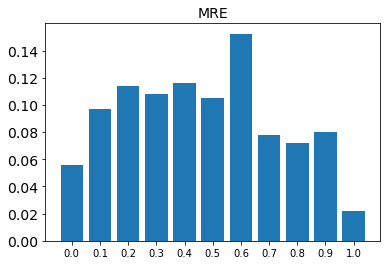

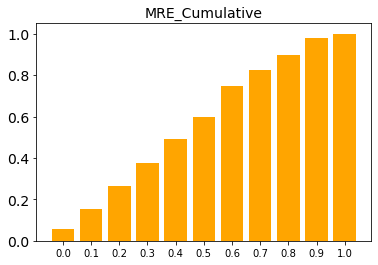

In [69]:
values = ['0.0', '0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8', '0.9', '1.0']
c0 = mre_list.count(0.0) / len(mre_list)
c1 = mre_list.count(0.1) / len(mre_list)
c2 = mre_list.count(0.2) / len(mre_list)
c3 = mre_list.count(0.3) / len(mre_list)
c4 = mre_list.count(0.4) / len(mre_list)
c5 = mre_list.count(0.5) / len(mre_list)
c6 = mre_list.count(0.6) / len(mre_list)
c7 = mre_list.count(0.7) / len(mre_list)
c8 = mre_list.count(0.8) / len(mre_list)
c9 = mre_list.count(0.9) / len(mre_list)
c10 = mre_list.count(1.0) / len(mre_list)
counts = np.array([c0, c1, c2, c3, c4, c5, c6, c7, c8, c9, c10])
counts_cumul = np.cumsum(counts)
print(counts)


plt.bar(values, counts)
plt.title('MRE', fontsize = 14)
plt.xticks(values)
plt.yticks(fontsize = 14)
# plt.savefig('MRE_clst1.jpg')
plt.show()

plt.bar(values, counts_cumul, color='orange')
plt.title('MRE_Cumulative', fontsize = 14)
plt.xticks(values)
plt.yticks(fontsize = 14)
# plt.savefig('MRE_cumulative_clst1.jpg')
plt.show()

In [70]:
mre_list

[0.3,
 0.8,
 0.0,
 0.1,
 0.9,
 0.2,
 0.0,
 0.1,
 0.0,
 0.2,
 0.9,
 0.6,
 0.2,
 0.9,
 0.6,
 0.5,
 0.0,
 0.7,
 0.3,
 0.4,
 0.5,
 0.7,
 0.4,
 0.5,
 0.1,
 0.3,
 0.7,
 0.4,
 0.6,
 0.1,
 0.9,
 0.4,
 0.3,
 0.9,
 0.4,
 0.3,
 0.5,
 0.7,
 0.8,
 0.6,
 0.5,
 0.0,
 0.1,
 0.9,
 0.5,
 0.4,
 0.9,
 0.4,
 0.3,
 0.3,
 0.1,
 1.0,
 0.4,
 0.9,
 0.7,
 0.6,
 0.0,
 0.3,
 0.0,
 0.2,
 0.8,
 0.8,
 0.9,
 0.6,
 0.2,
 0.0,
 0.8,
 0.7,
 0.6,
 0.6,
 0.6,
 0.4,
 0.9,
 0.8,
 0.1,
 0.6,
 0.7,
 0.5,
 0.6,
 0.5,
 0.7,
 0.2,
 0.2,
 0.0,
 0.4,
 0.3,
 0.2,
 0.6,
 0.4,
 0.3,
 0.2,
 0.8,
 0.6,
 0.9,
 0.3,
 0.2,
 0.3,
 0.7,
 0.4,
 0.4,
 0.5,
 0.6,
 0.2,
 0.5,
 0.2,
 0.6,
 0.3,
 0.5,
 0.7,
 0.1,
 1.0,
 0.9,
 0.2,
 0.6,
 0.2,
 0.3,
 0.4,
 0.6,
 0.3,
 1.0,
 0.7,
 0.9,
 0.6,
 0.6,
 0.3,
 0.4,
 0.6,
 0.1,
 0.2,
 0.9,
 0.4,
 0.1,
 0.3,
 0.3,
 0.1,
 0.2,
 0.5,
 0.9,
 0.1,
 0.4,
 0.8,
 0.9,
 0.3,
 0.0,
 0.4,
 0.3,
 0.4,
 0.4,
 0.3,
 0.5,
 0.2,
 0.3,
 0.3,
 0.6,
 0.6,
 0.1,
 0.1,
 0.5,
 0.2,
 0.2,
 0.5,
 0.5,
 0.8,
 0.9,
 0.9,
 0.1,
 0.5

[  4   0  40   8   2  37  35   2   0   0 233]
[361 361 361 361 361 361 361 361 361 361 361]
[0.01108033 0.         0.11080332 0.02216066 0.00554017 0.10249307
 0.09695291 0.00554017 0.         0.         0.64542936]
['[0.0, 0.1)', '[0.1, 0.2)', '[0.2, 0.3)', '[0.3, 0.4)', '[0.4, 0.5)', '[0.5, 0.6)', '[0.6, 0.7)', '[0.7, 0.8)', '[0.8, 0.9)', '[0.9, 1.0)', '1.0']


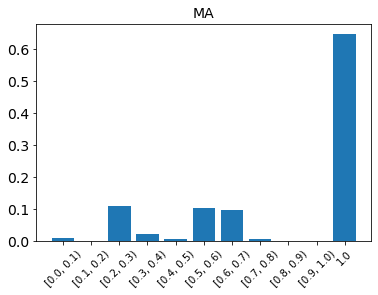

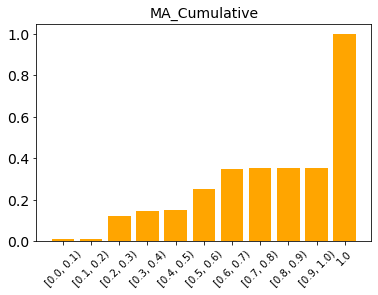

In [71]:
bins = np.arange(0, 1.2, 0.1)
hist, bins = np.histogram(np.array(ma_list), bins)

ma_values = ['[0.0, 0.1)', '[0.1, 0.2)', '[0.2, 0.3)', '[0.3, 0.4)', '[0.4, 0.5)', '[0.5, 0.6)', '[0.6, 0.7)', '[0.7, 0.8)', '[0.8, 0.9)', '[0.9, 1.0)', '1.0']
denominator = np.array([len(ma_list) for i in range(len(ma_values))])
print(hist)
print(denominator)
ma_counts = hist / len(ma_list)
print(ma_counts)
print(ma_values)
ma_counts_cumul = np.cumsum(ma_counts)

# plt.hist((ma_array), bins, rwidth = 0.8)
# plt.title('MA', fontsize = 14)
# plt.xticks(np.arange(0, 1.0, 0.1))
# plt.yticks(fontsize = 14)
# plt.show()

plt.bar(ma_values, ma_counts)
plt.title('MA', fontsize = 14)
plt.xticks(ma_values)
plt.xticks(rotation=45)
plt.yticks(fontsize = 14)
plt.savefig('MA_clst1.jpg')
plt.show()

plt.bar(ma_values, ma_counts_cumul, color='orange')
plt.title('MA_Cumulative', fontsize = 14)
plt.xticks(ma_values)
plt.xticks(rotation=45)
plt.yticks(fontsize = 14)
plt.savefig('MA_cumulative_clst1.jpg')
plt.show()

In [72]:
len(ma_list)

361

In [73]:
sum(hist)

361

In [74]:
# 초기 경로 데이터
import math 
import time 
start = time.time() 


input_seq_str = np.array(['-', '-', '-', 'Bs0114', 'Bs0114', 'Bs0114', 'Bs0114', 'Bs0114', 'Bs0114', 'Bs0114', 'Bs0114',\
             'Sx0049', 'Sx0049', 'Sx0049', 'Sx0049'])
input_seq = seq_to_vec(input_seq_str)
input_seq = np.reshape(input_seq, (1, 15))

# 정답 (실제 적용에서는 정답이 없으나 이 경우 정확도 비교를 위해 정답 가져옴)
target_seq_str = np.array(['Sx0049', 'Sx0049', 'Sx0049', '-', '-', '-', '-', '-', '-', '-'])
target_seq = seq_to_vec(target_seq_str)
target_seq = np.reshape(target_seq, (1, 10))

# 모델에 넣어 이후 경로 추천 (예측)
decoded_sentence = decode_sequence(input_seq)
end = time.time()

inputstr = "입력 :" + str(input_seq_str)
targetstr = "정답 :" + str(target_seq_str)

outputstr = "출력결과 :" + str(decoded_sentence)

print(inputstr)
print(targetstr)
print(outputstr)
print("-"*50)
 
print(f"{end - start:.5f} sec")

입력 :['-' '-' '-' 'Bs0114' 'Bs0114' 'Bs0114' 'Bs0114' 'Bs0114' 'Bs0114'
 'Bs0114' 'Bs0114' 'Sx0049' 'Sx0049' 'Sx0049' 'Sx0049']
정답 :['Sx0049' 'Sx0049' 'Sx0049' '-' '-' '-' '-' '-' '-' '-']
출력결과 :['Sx0049', 'Sx0049', 'Sx0049', 'Sx0049', 'Sx0049', 'Sx0049', 'Sx0049', 'Sx0049', 'Sx0049', 'Sx0049']
--------------------------------------------------
0.85272 sec
